In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\ASUS'

In [4]:
df = pd.read_csv('covid_19_data.csv')

In [5]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [6]:
df.drop(['SNo', 'Last Update'],axis = 1,inplace = True)

In [7]:
df.rename(columns = {'ObservationDate': 'Date', 'Province/State': 'State', 'Country/Region': 'Country'},inplace = True)

In [8]:
df

Date              State         Country  Confirmed  Deaths  \
0       01/22/2020              Anhui  Mainland China        1.0     0.0   
1       01/22/2020            Beijing  Mainland China       14.0     0.0   
2       01/22/2020          Chongqing  Mainland China        6.0     0.0   
3       01/22/2020             Fujian  Mainland China        1.0     0.0   
4       01/22/2020              Gansu  Mainland China        0.0     0.0   
...            ...                ...             ...        ...     ...   
306424  05/29/2021  Zaporizhia Oblast         Ukraine   102641.0  2335.0   
306425  05/29/2021            Zeeland     Netherlands    29147.0   245.0   
306426  05/29/2021           Zhejiang  Mainland China     1364.0     1.0   
306427  05/29/2021    Zhytomyr Oblast         Ukraine    87550.0  1738.0   
306428  05/29/2021       Zuid-Holland     Netherlands   391559.0  4252.0   

        Recovered  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
306424    95289.0  
306425        0.0  
306426     1324.0  
306427    83790.0  
306428        0.0  

[306429 rows x 6 columns]

In [9]:
df.describe()

Confirmed         Deaths     Recovered
count  3.064290e+05  306429.000000  3.064290e+05
mean   8.567091e+04    2036.403268  5.042029e+04
std    2.775516e+05    6410.938048  2.015124e+05
min   -3.028440e+05    -178.000000 -8.544050e+05
25%    1.042000e+03      13.000000  1.100000e+01
50%    1.037500e+04     192.000000  1.751000e+03
75%    5.075200e+04    1322.000000  2.027000e+04
max    5.863138e+06  112385.000000  6.399531e+06

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
Date         306429 non-null object
State        228329 non-null object
Country      306429 non-null object
Confirmed    306429 non-null float64
Deaths       306429 non-null float64
Recovered    306429 non-null float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


In [11]:
imp_0 = SimpleImputer(missing_values = np.nan, strategy = 'constant')

In [12]:
df2 = pd.DataFrame(imp_0.fit_transform(df), columns = df.columns)

In [13]:
df2[100:200:20]

Date    State         Country Confirmed Deaths Recovered
100  01/24/2020   Fujian  Mainland China        10      0         0
120  01/24/2020  Qinghai  Mainland China         0      0         0
140  01/25/2020  Sichuan  Mainland China        28      0         0
160  01/25/2020   Taiwan          Taiwan         3      0         0
180  01/26/2020    Henan  Mainland China        83      1         0

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
Date         306429 non-null object
State        306429 non-null object
Country      306429 non-null object
Confirmed    306429 non-null object
Deaths       306429 non-null object
Recovered    306429 non-null object
dtypes: object(6)
memory usage: 14.0+ MB


In [17]:
df3 = df2.groupby(['Country', 'Date'])[['Country','Date', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [18]:
df3.head(15)

Country        Date  Confirmed  Deaths  Recovered
0        Azerbaijan  02/28/2020        1.0     0.0        0.0
1   ('St. Martin',)  03/10/2020        2.0     0.0        0.0
2       Afghanistan  01/01/2021    51526.0  2191.0    41727.0
3       Afghanistan  01/02/2021    51526.0  2191.0    41727.0
4       Afghanistan  01/03/2021    51526.0  2191.0    41727.0
5       Afghanistan  01/04/2021    53011.0  2237.0    42530.0
6       Afghanistan  01/05/2021    53105.0  2244.0    42666.0
7       Afghanistan  01/06/2021    53105.0  2244.0    42666.0
8       Afghanistan  01/07/2021    53207.0  2253.0    43291.0
9       Afghanistan  01/08/2021    53332.0  2257.0    43440.0
10      Afghanistan  01/09/2021    53400.0  2264.0    43740.0
11      Afghanistan  01/10/2021    53489.0  2277.0    43948.0
12      Afghanistan  01/11/2021    53538.0  2288.0    44137.0
13      Afghanistan  01/12/2021    53584.0  2301.0    44608.0
14      Afghanistan  01/13/2021    53584.0  2301.0    44850.0

In [19]:
countries = df3['Country'].unique()

In [20]:
len(countries)

229

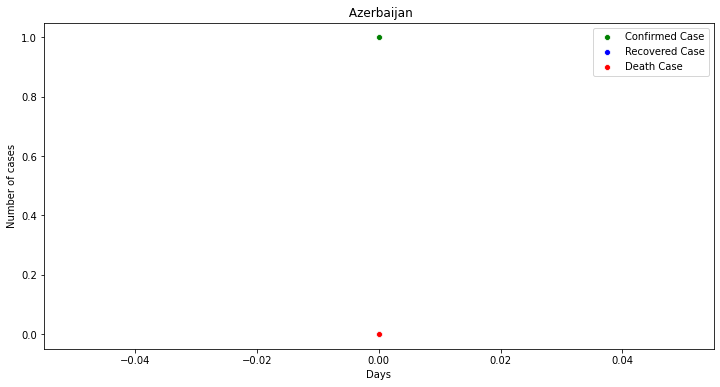

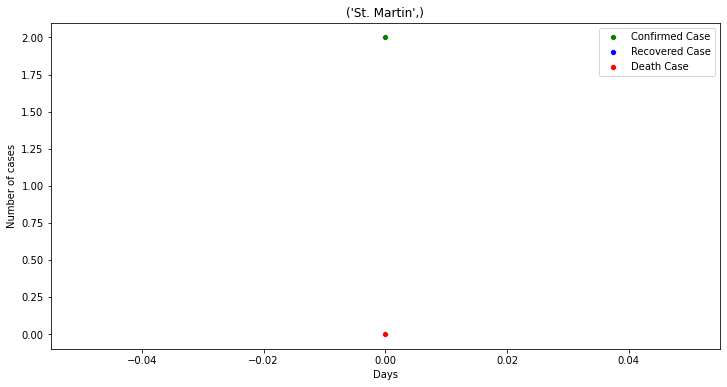

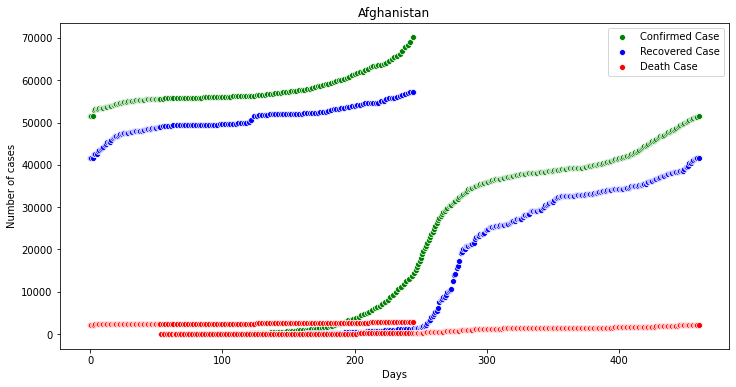

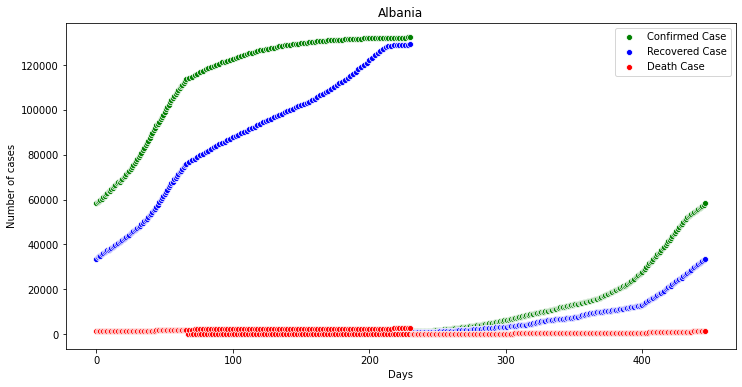

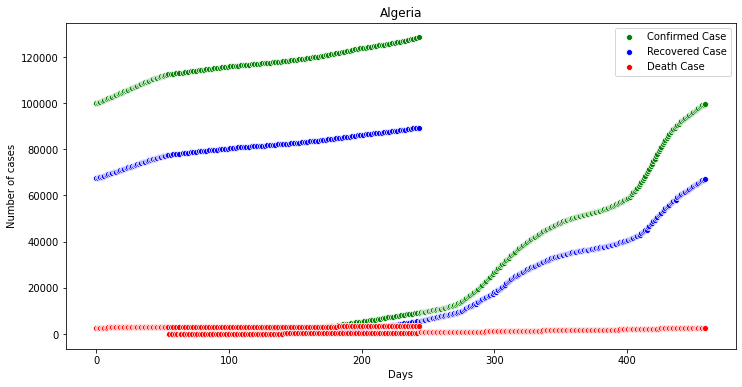

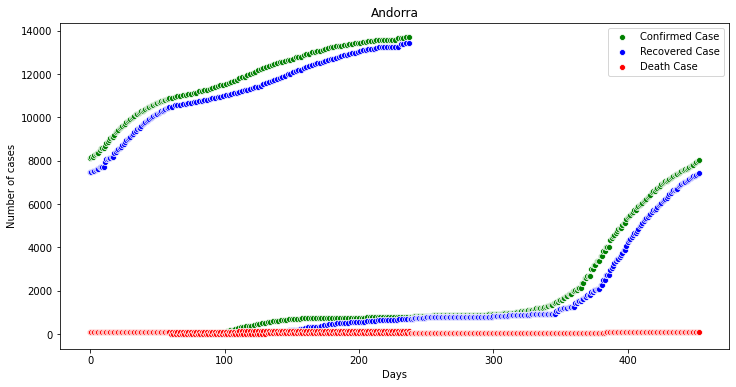

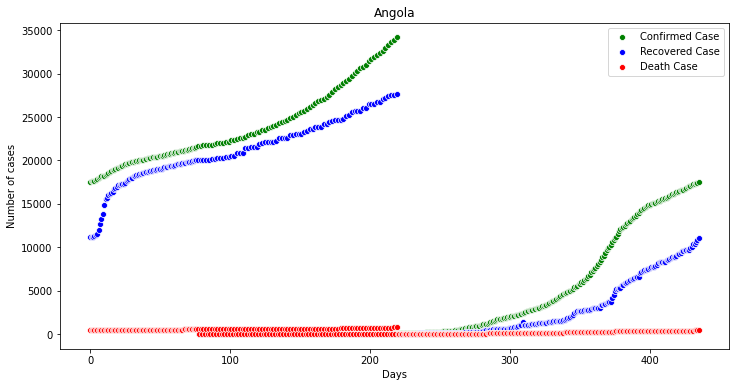

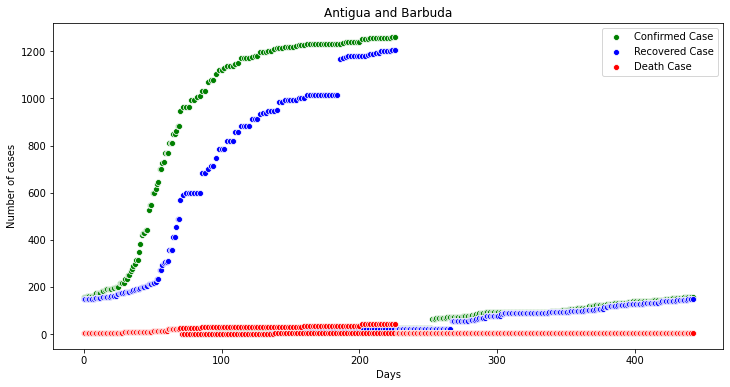

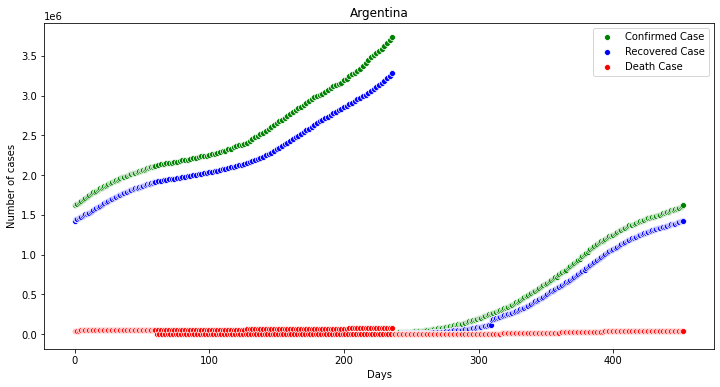

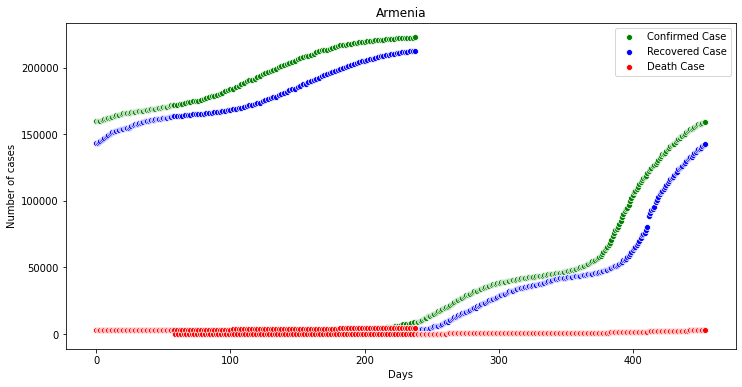

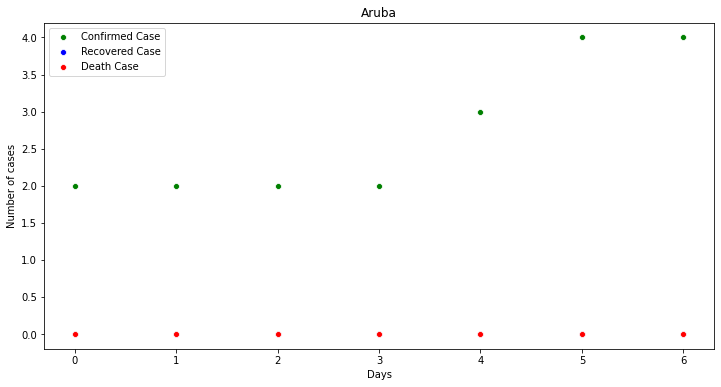

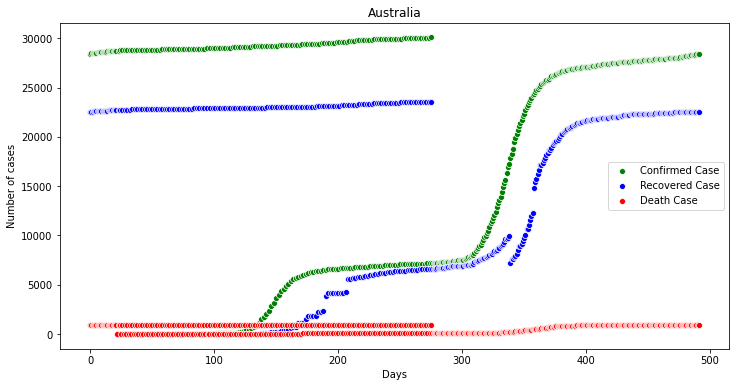

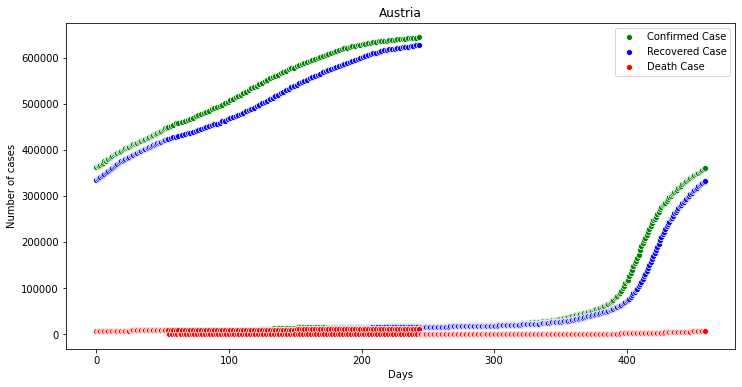

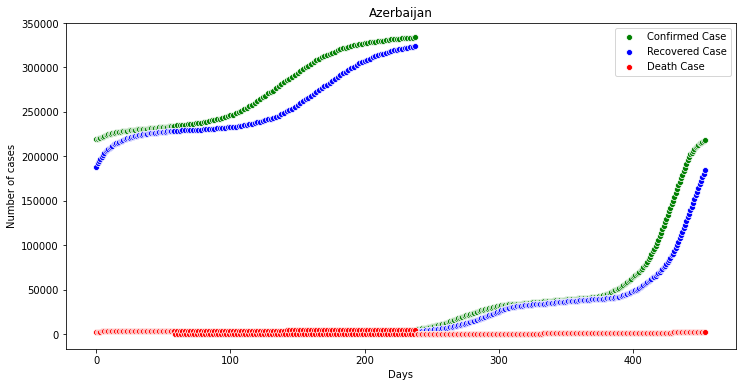

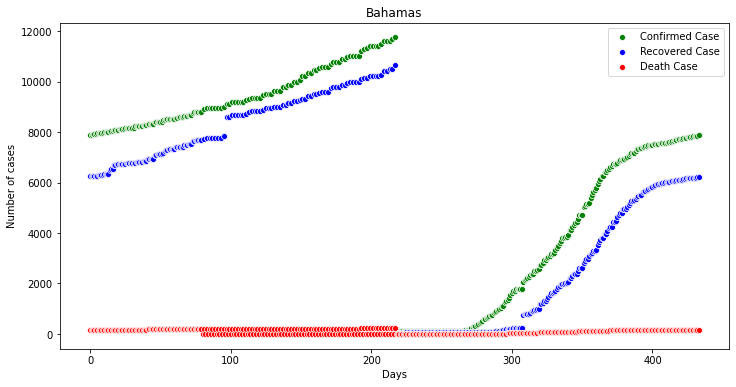

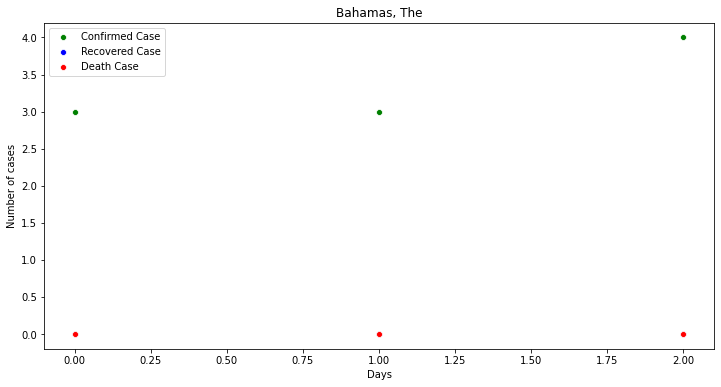

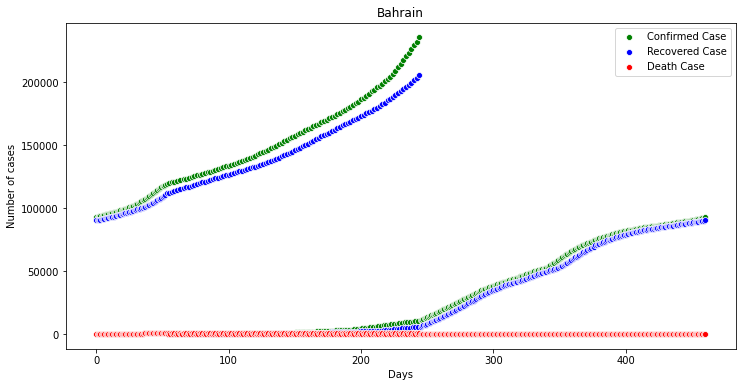

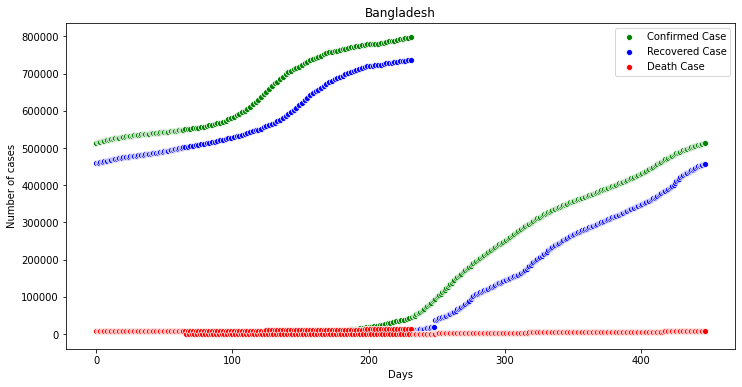

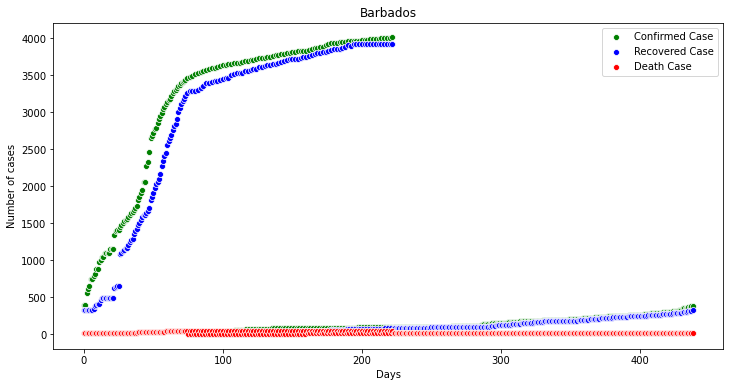

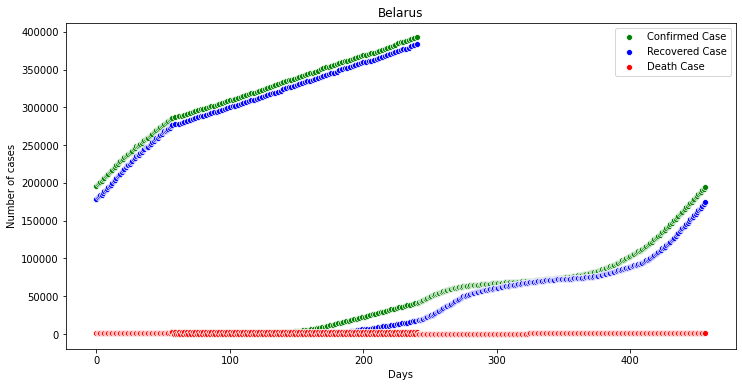

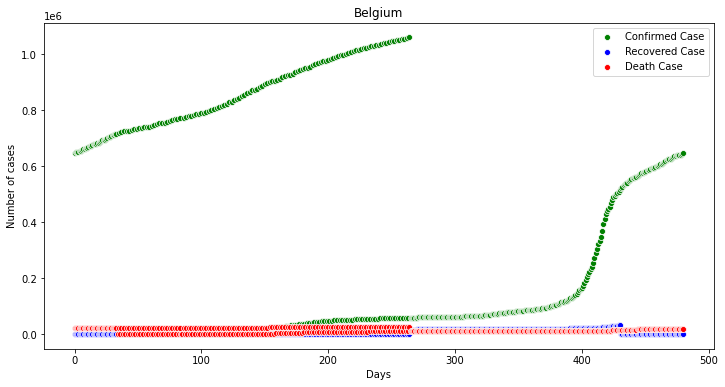

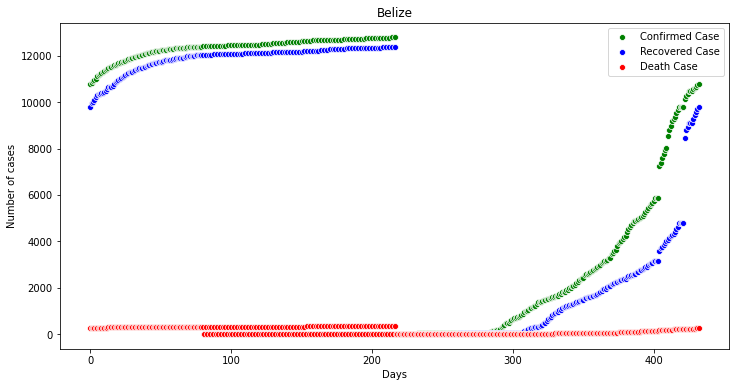

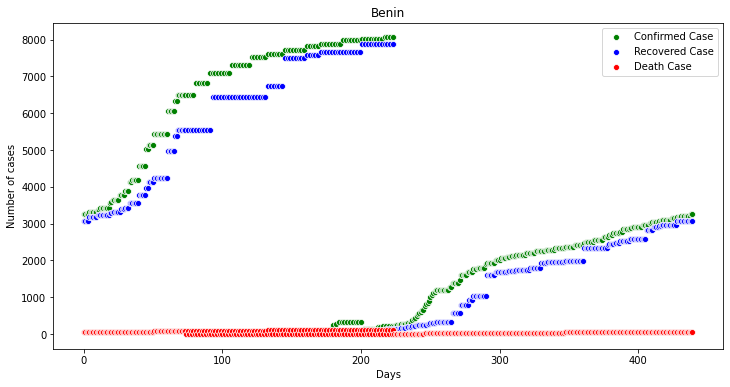

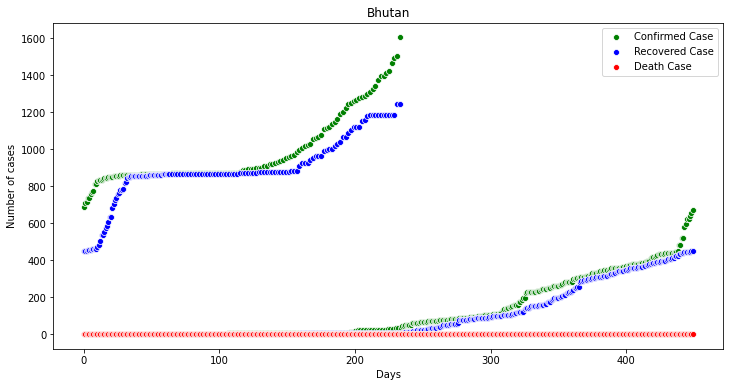

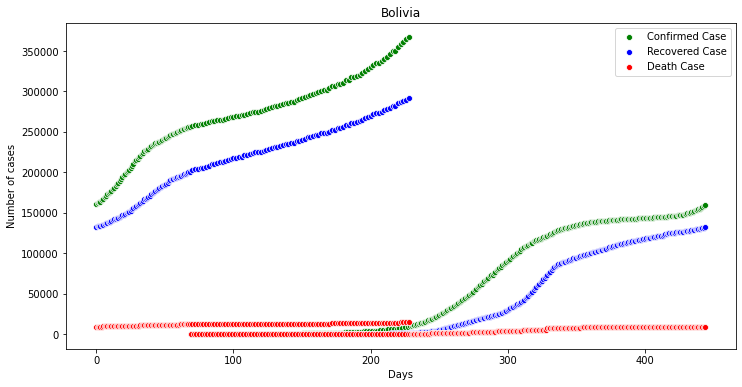

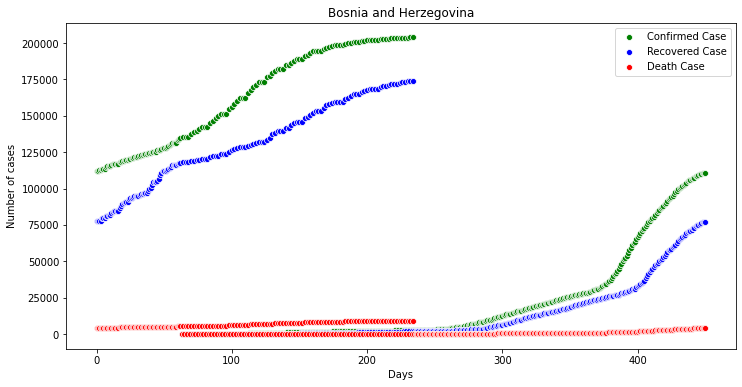

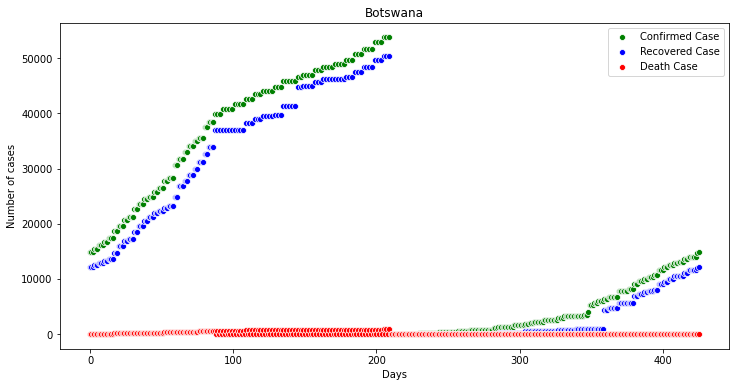

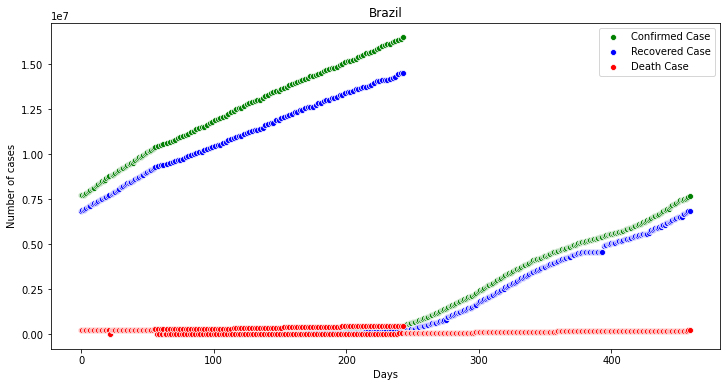

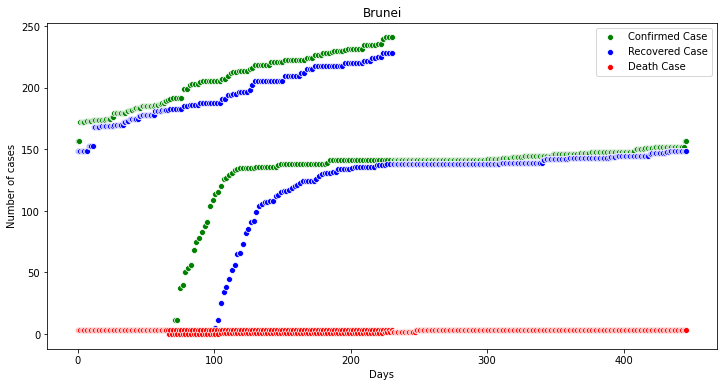

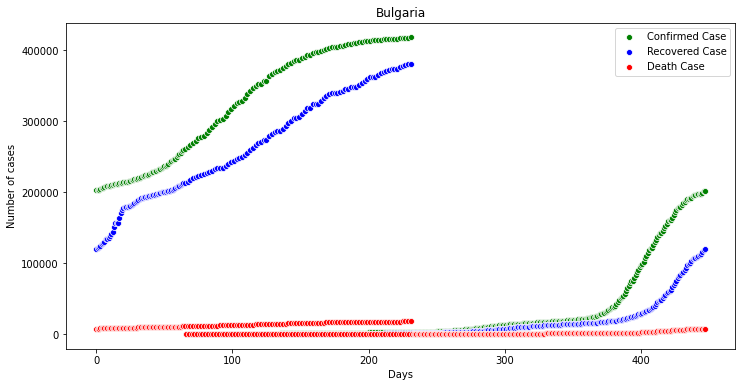

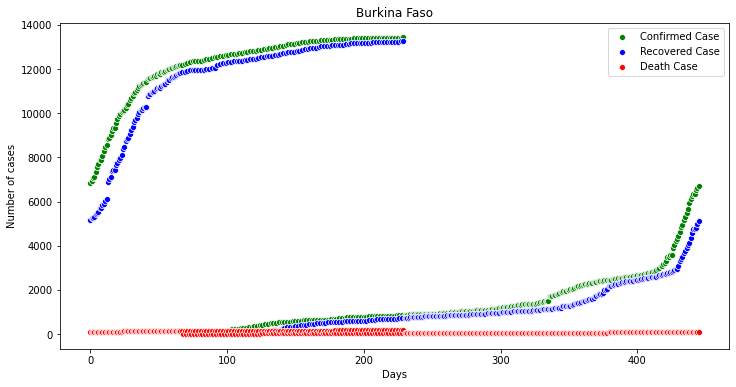

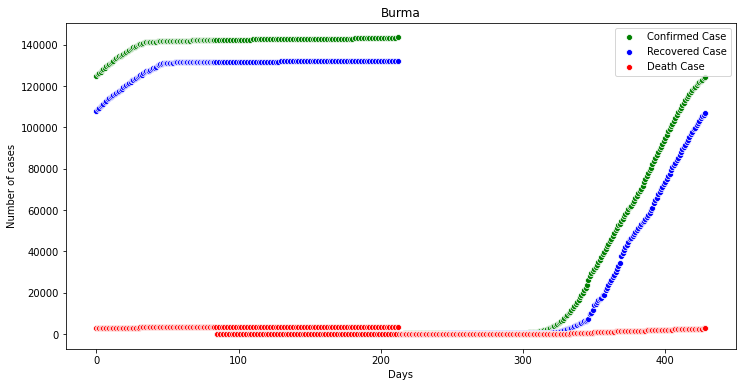

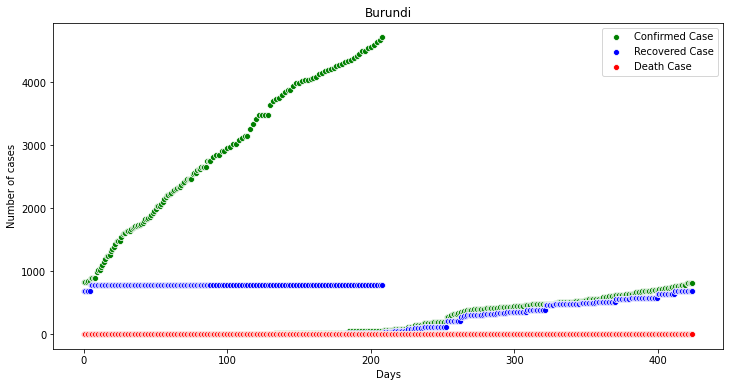

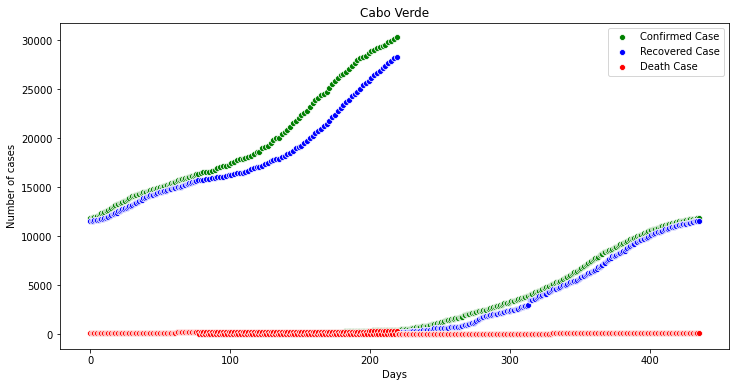

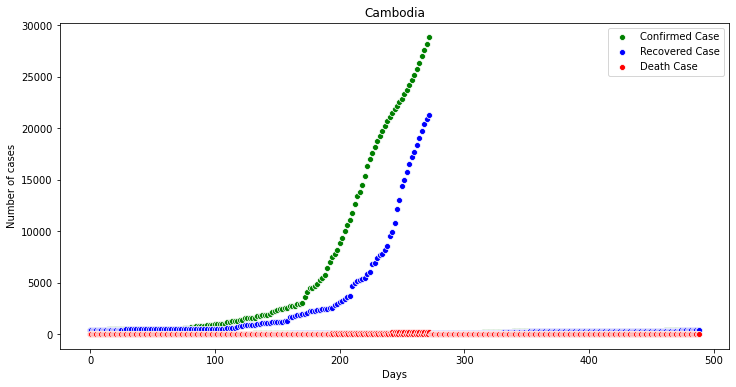

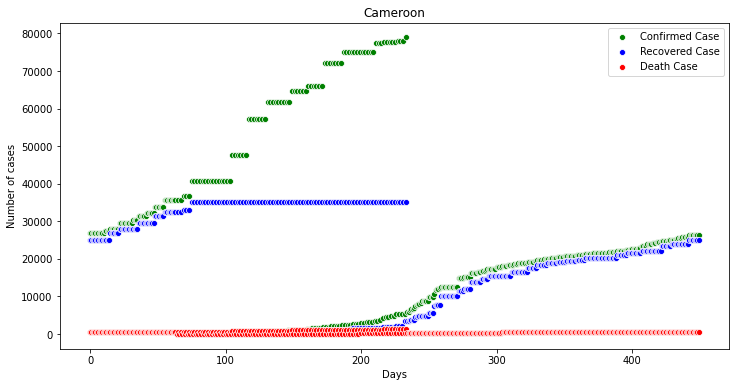

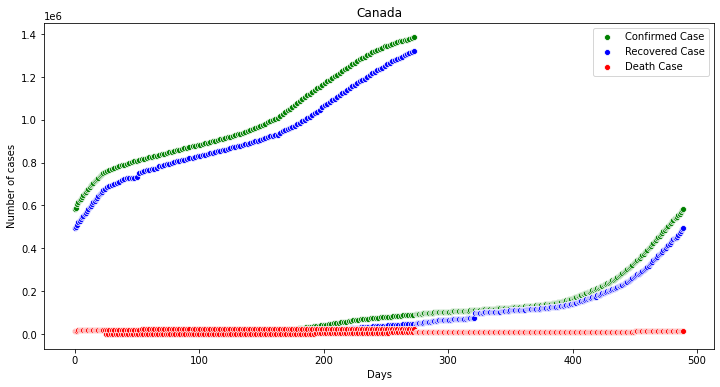

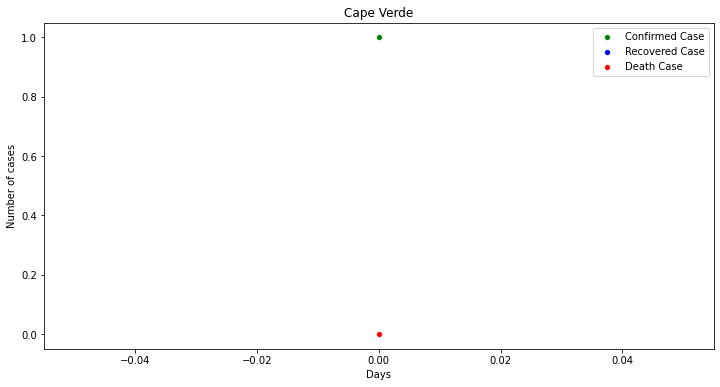

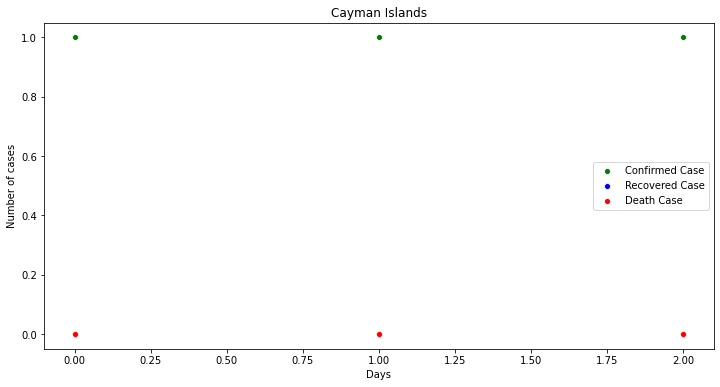

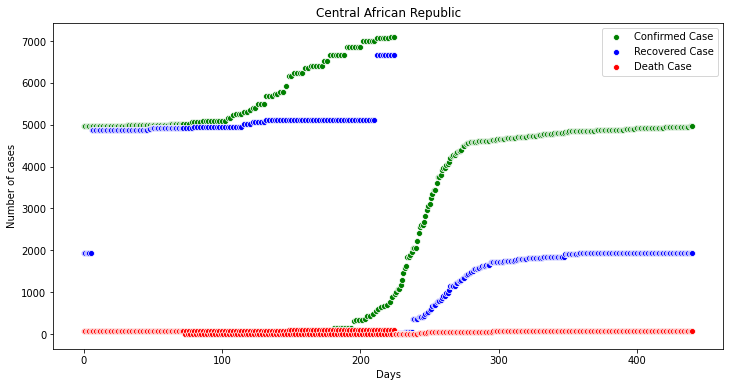

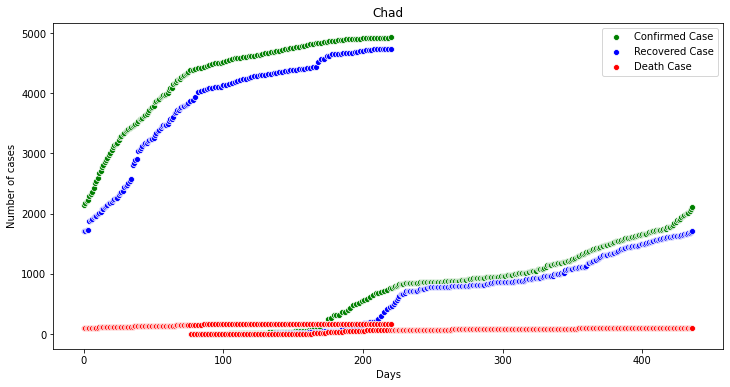

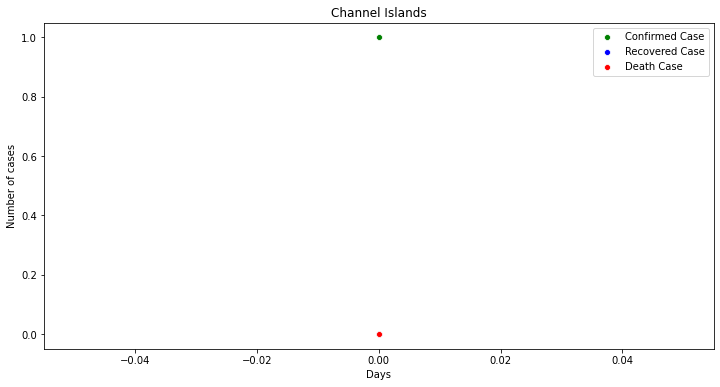

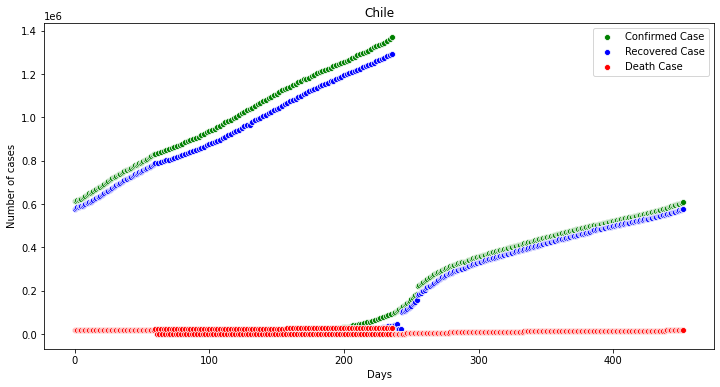

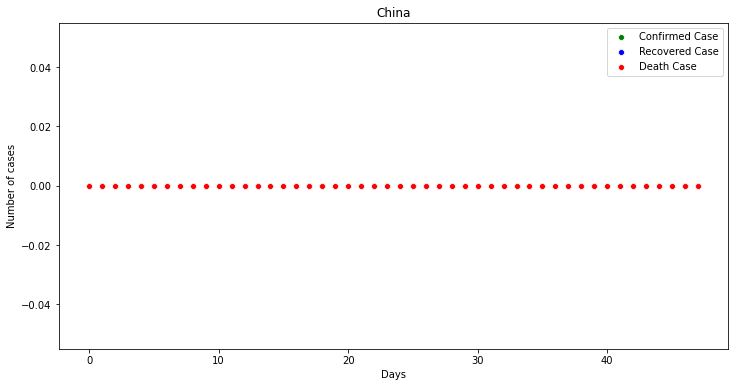

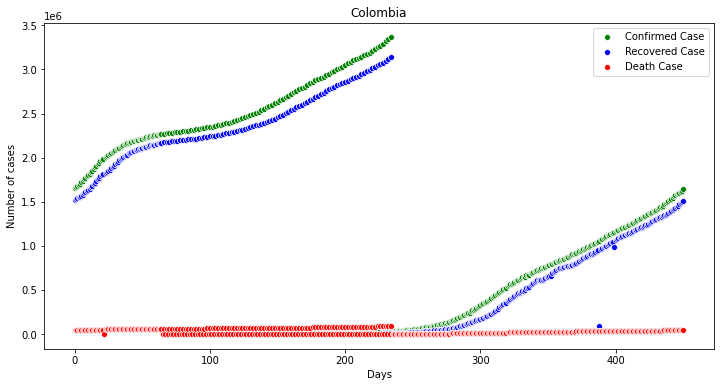

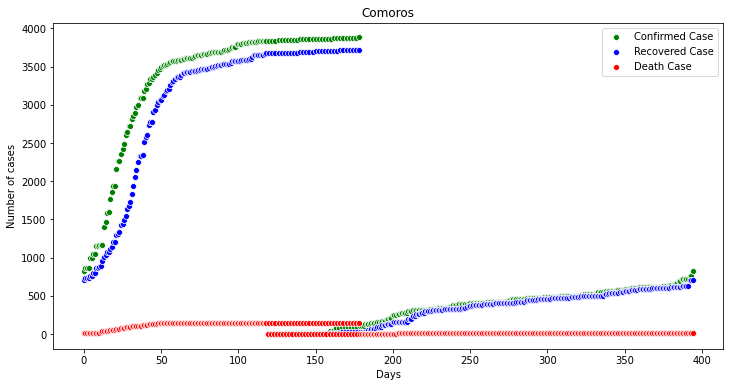

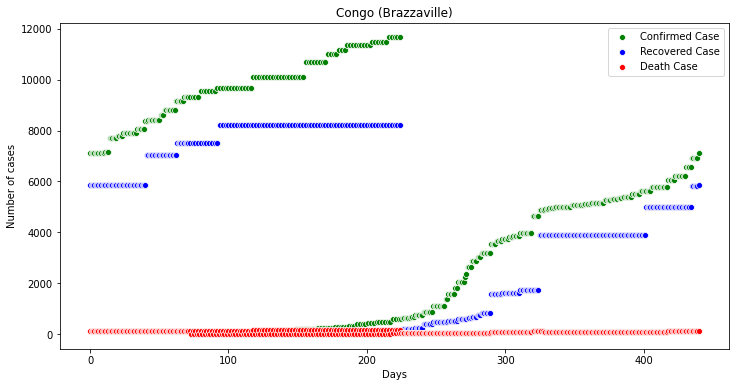

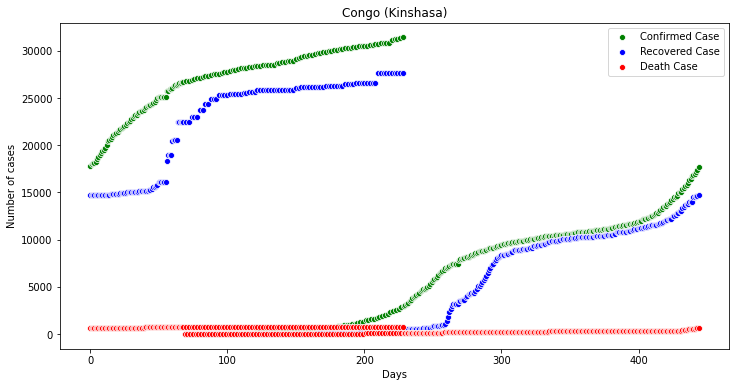

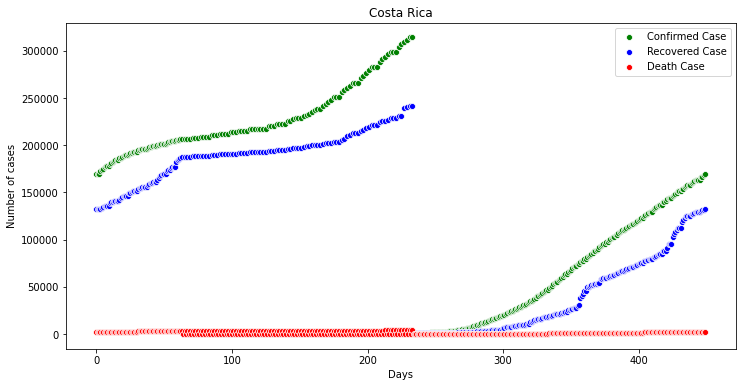

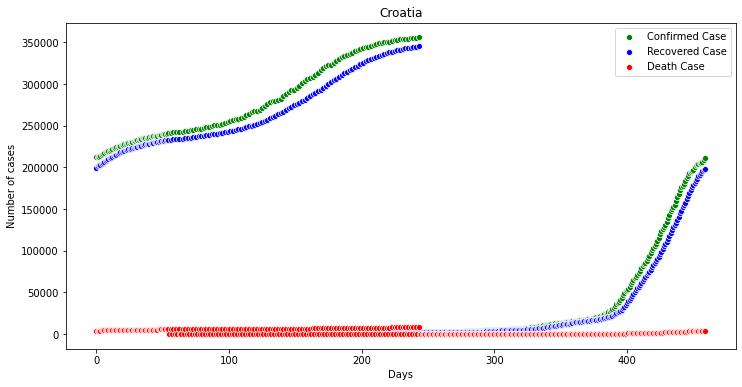

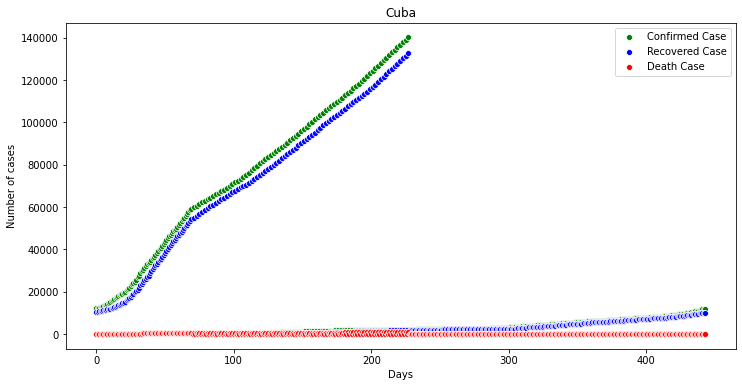

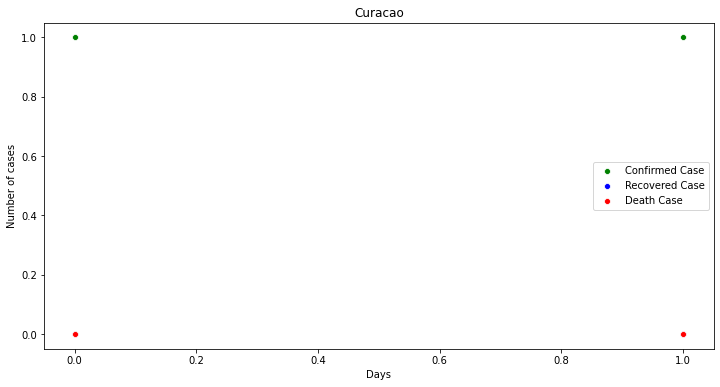

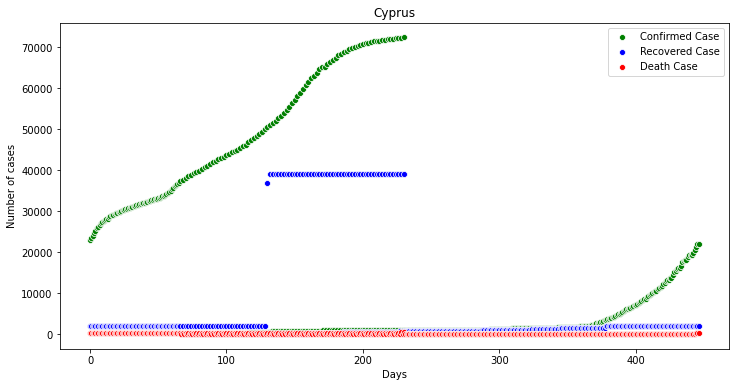

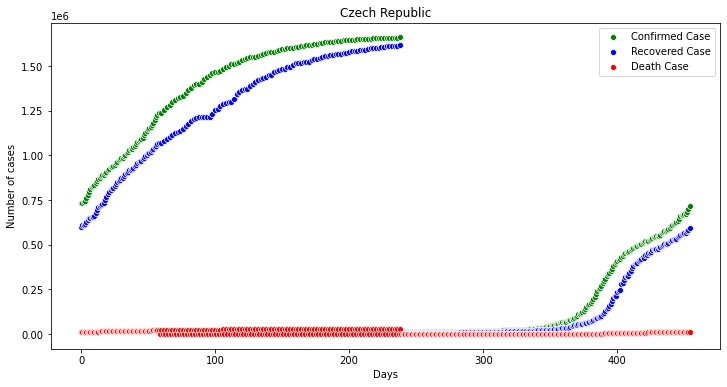

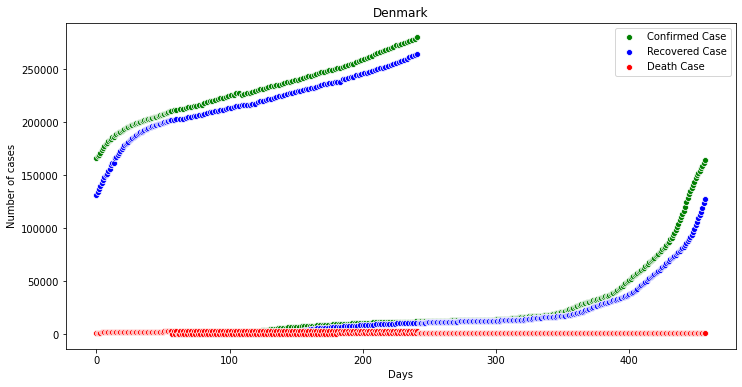

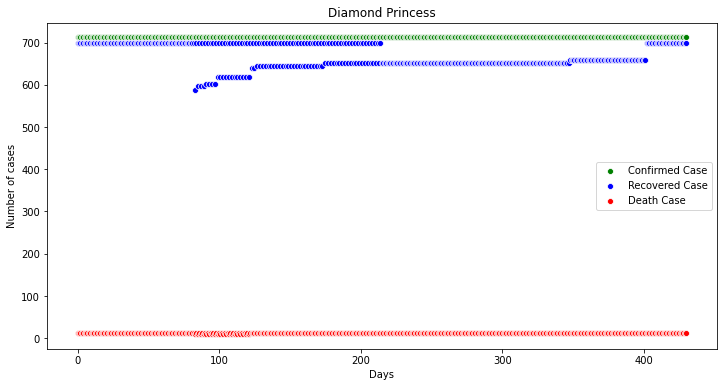

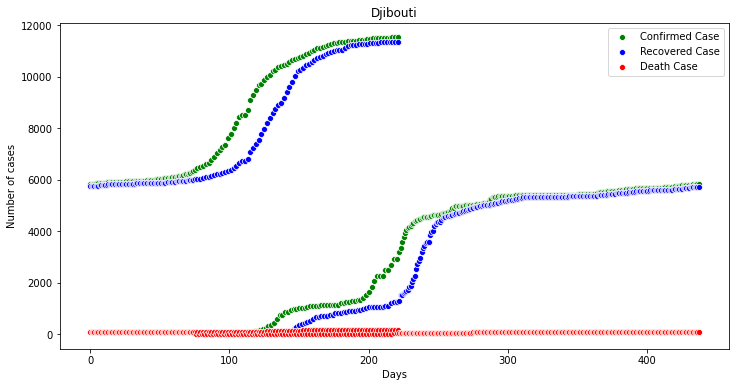

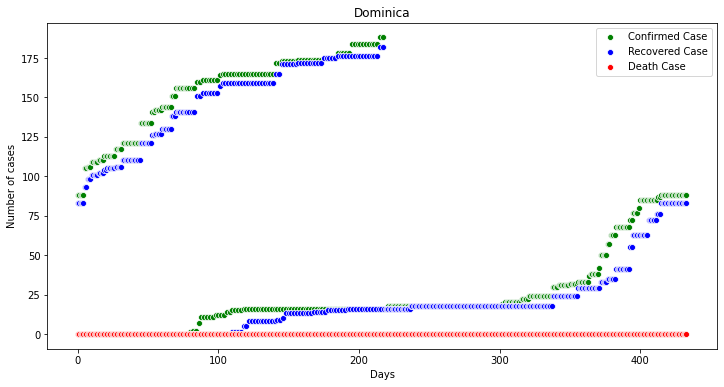

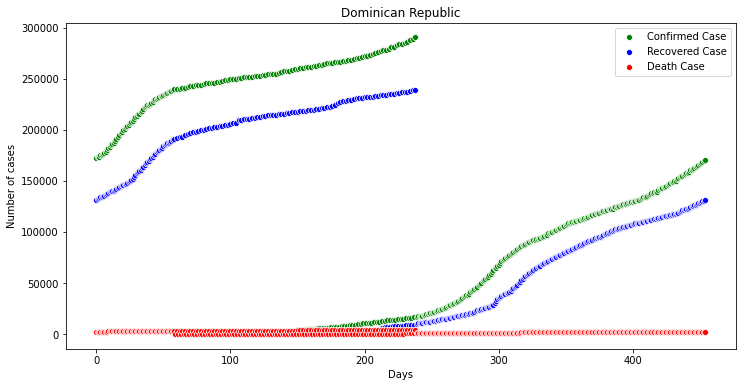

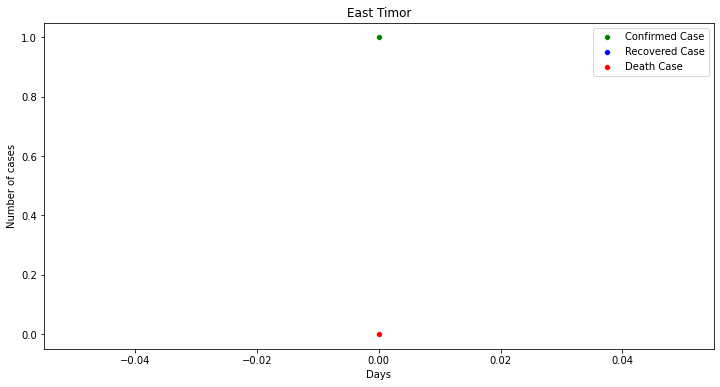

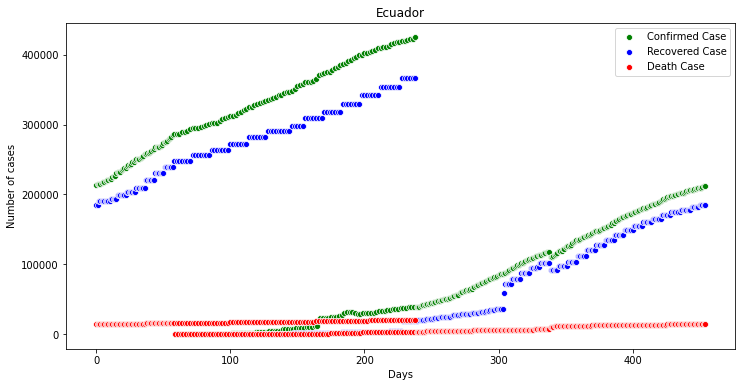

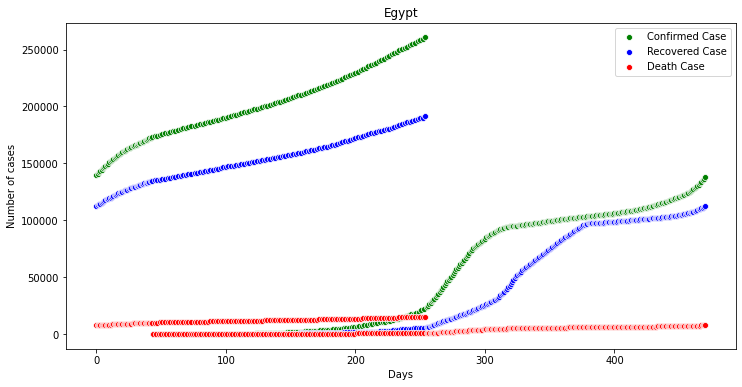

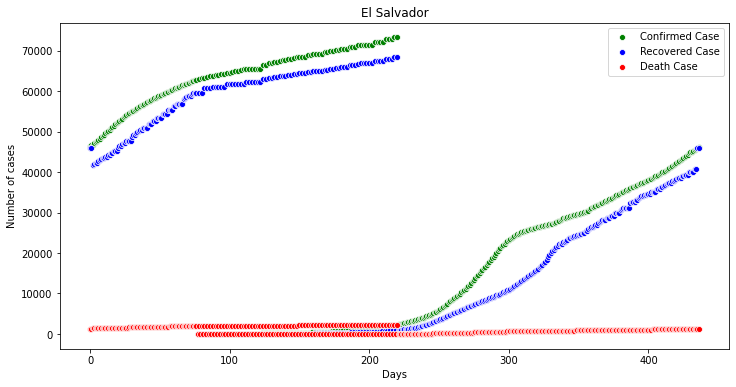

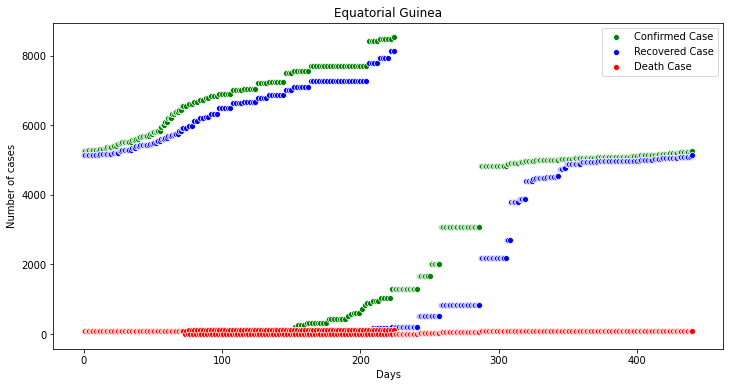

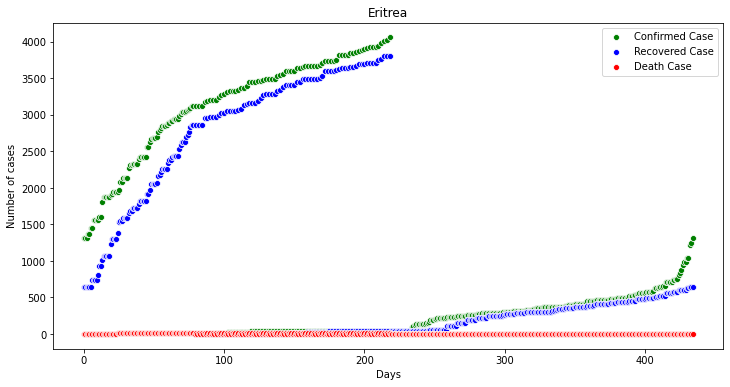

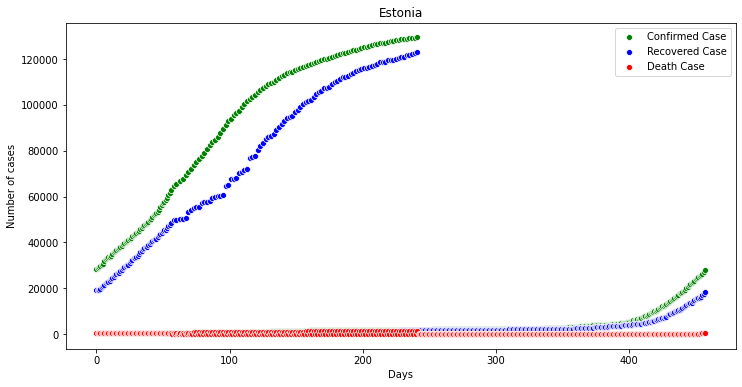

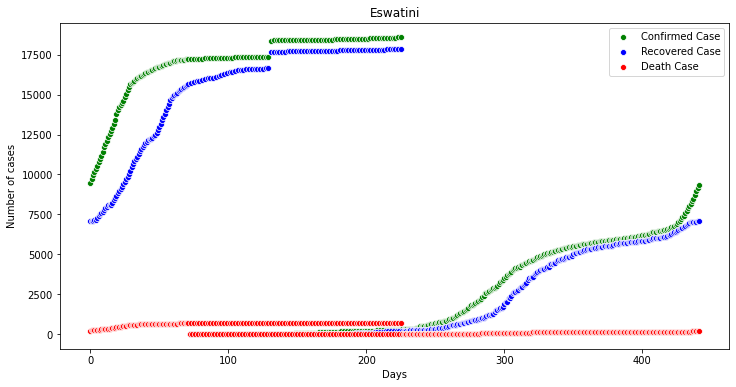

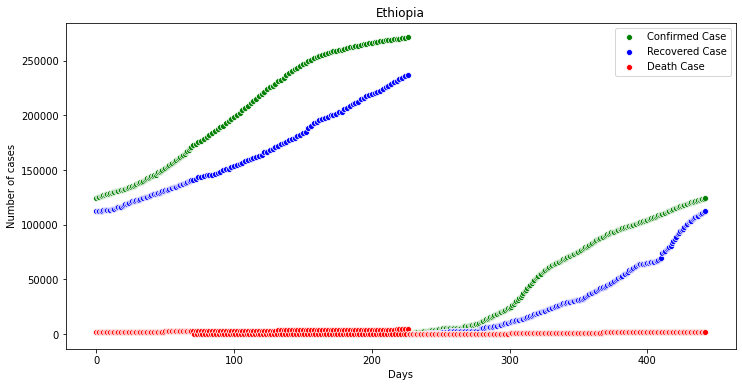

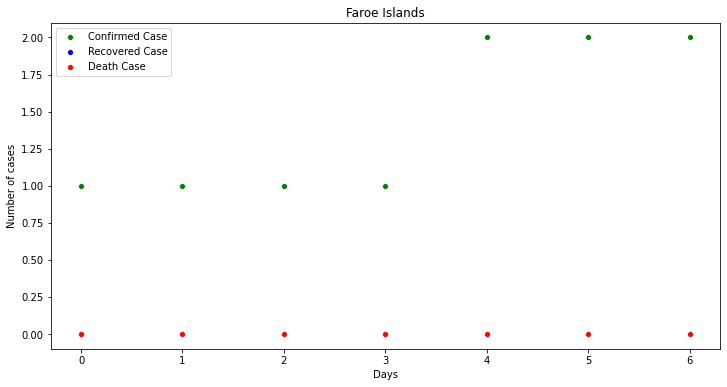

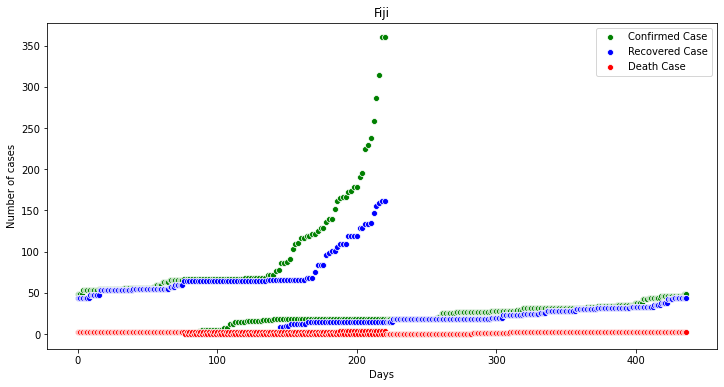

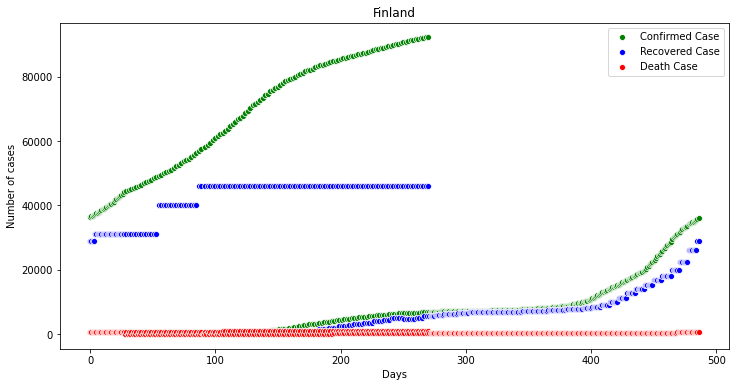

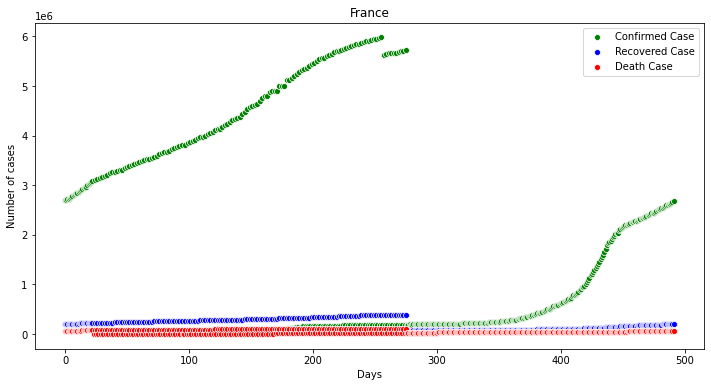

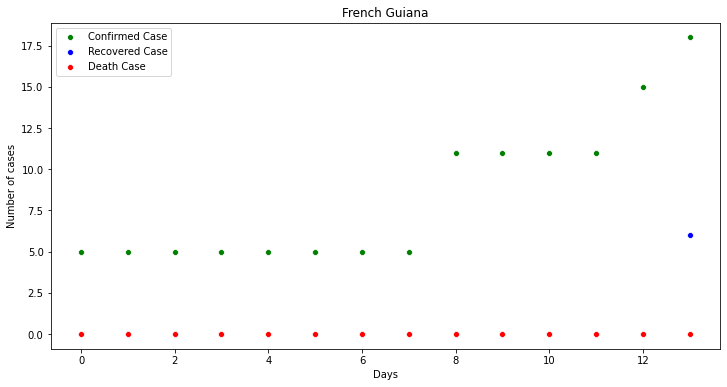

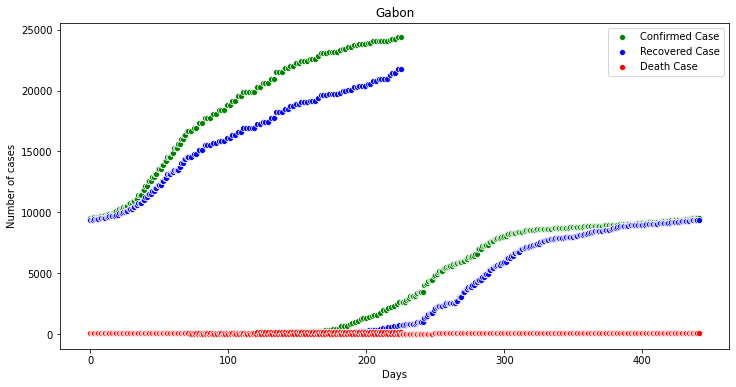

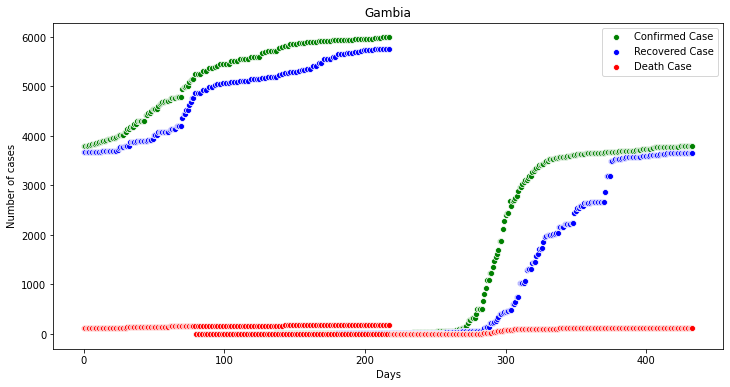

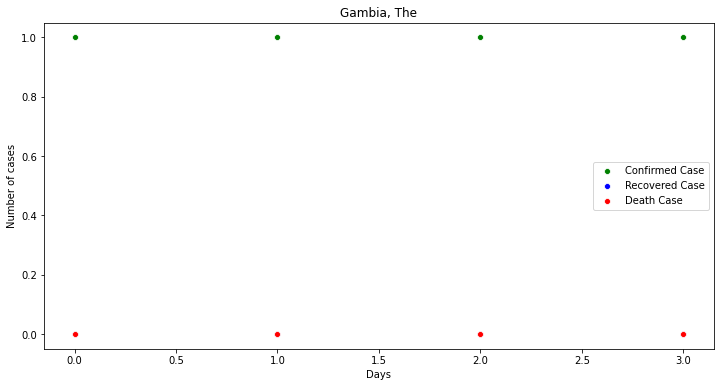

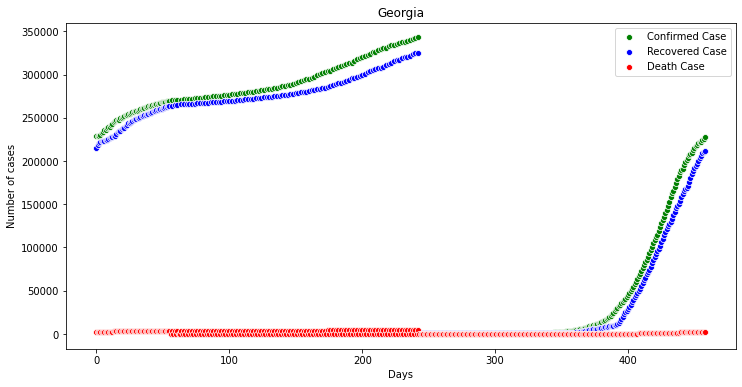

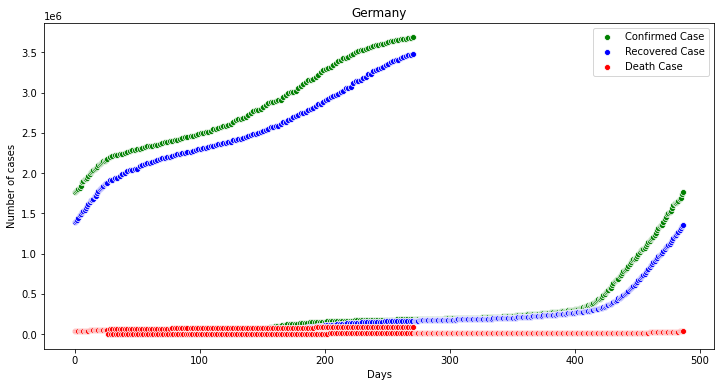

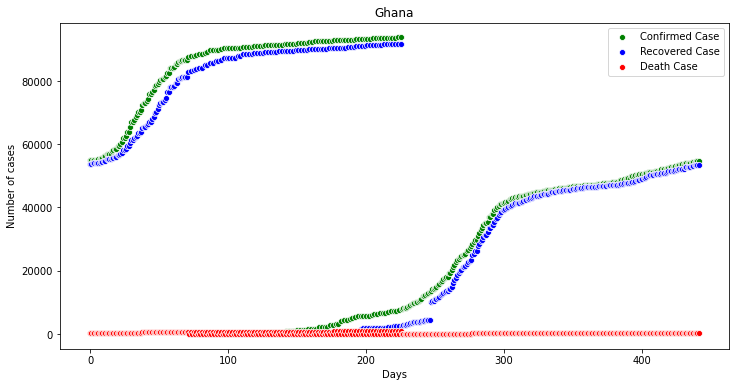

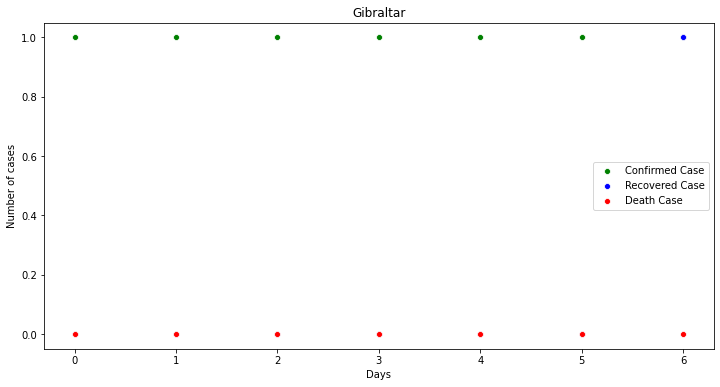

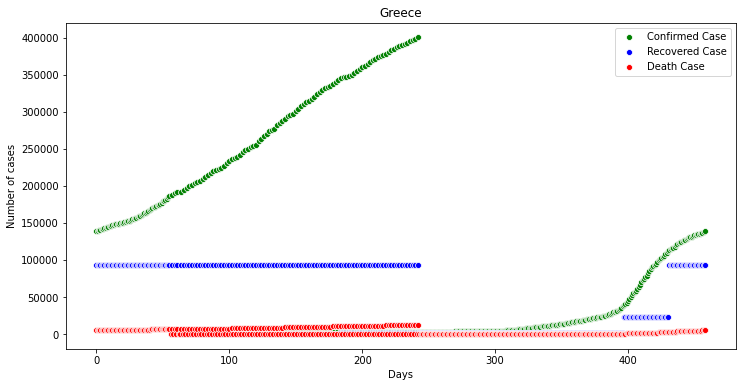

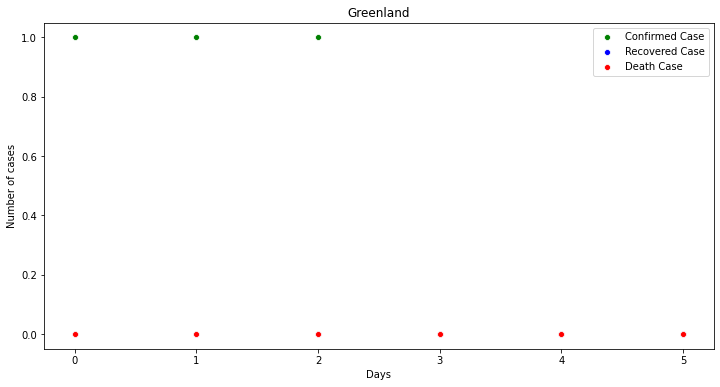

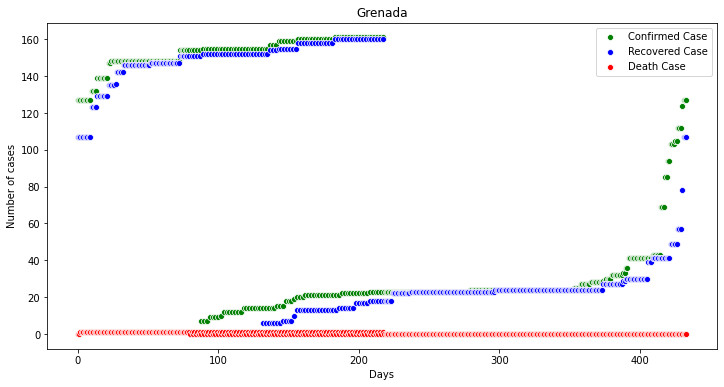

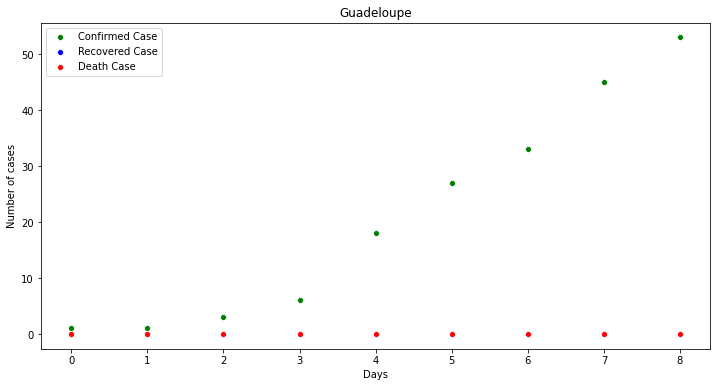

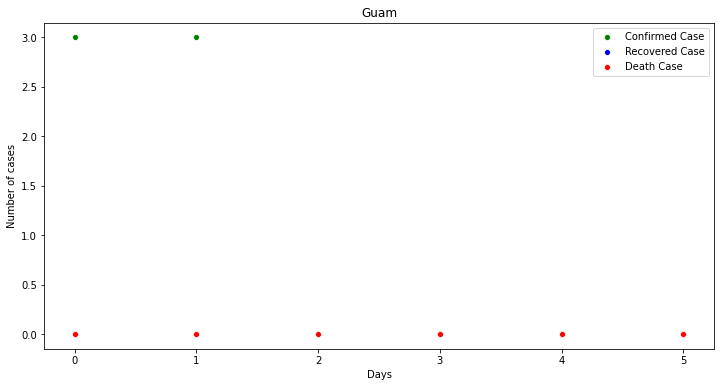

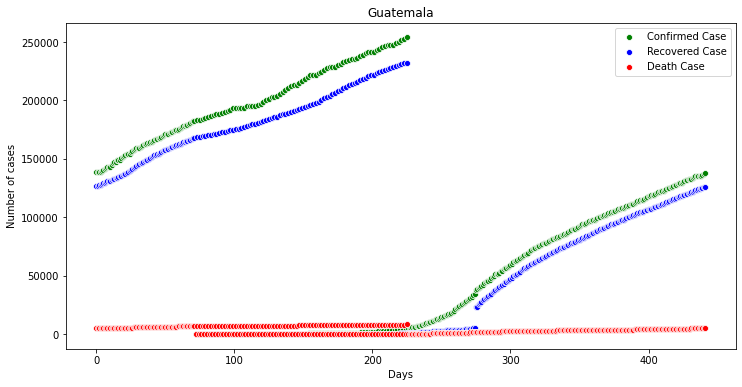

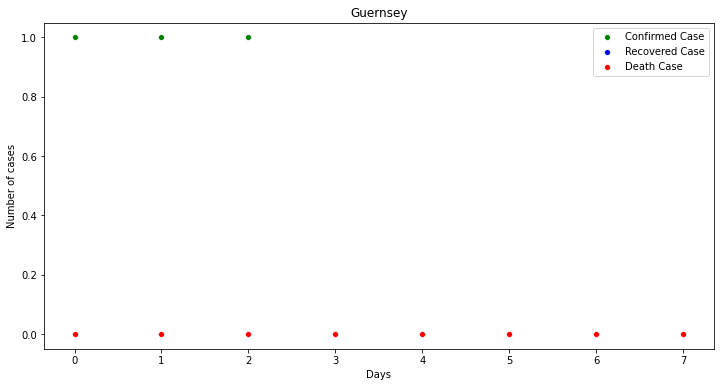

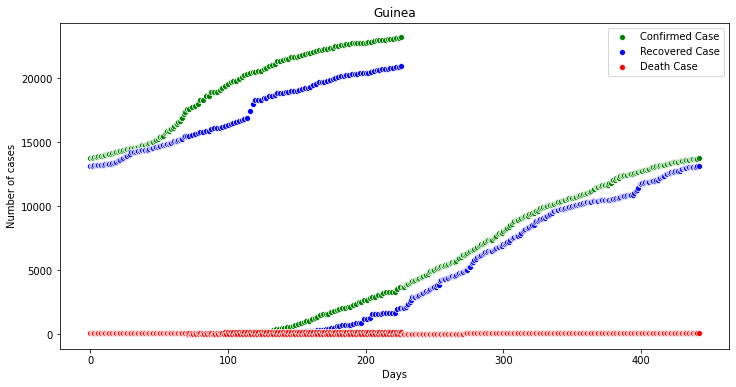

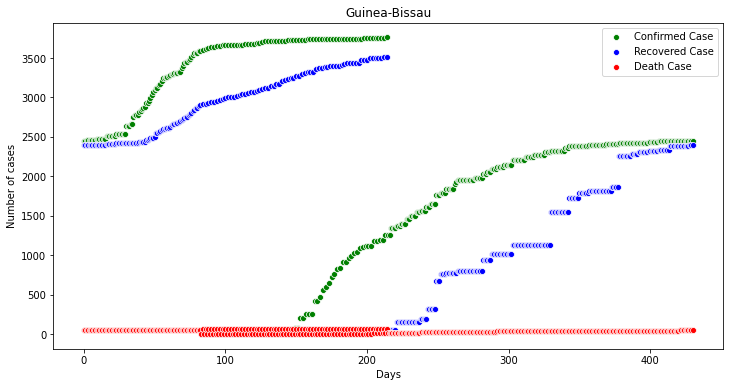

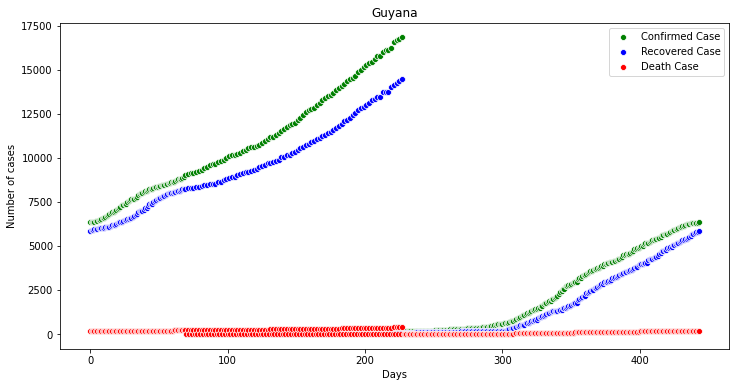

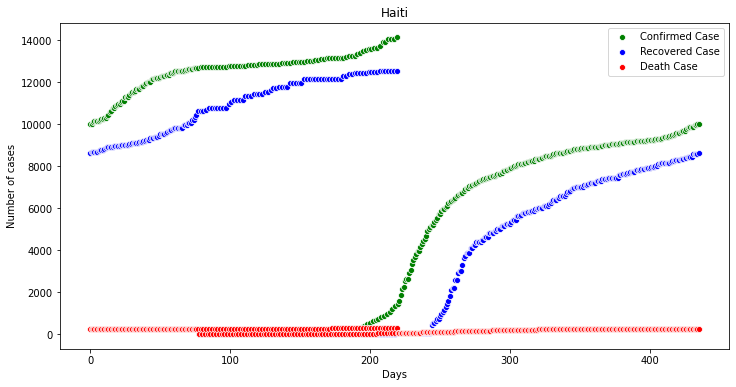

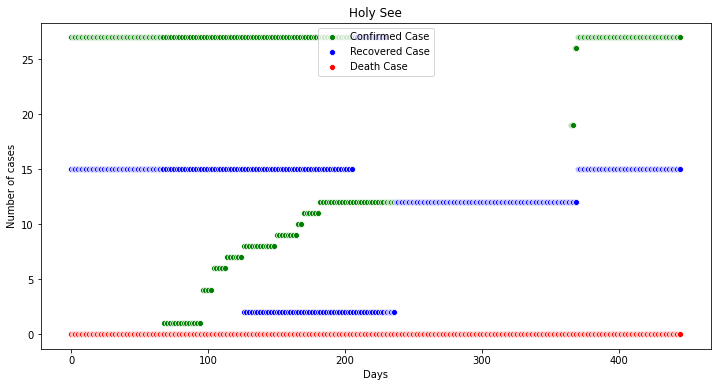

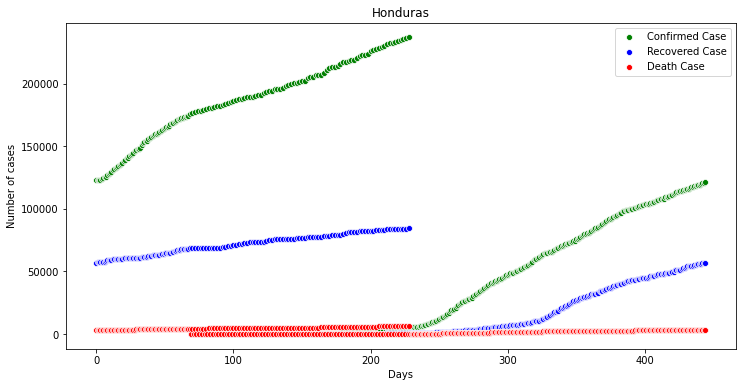

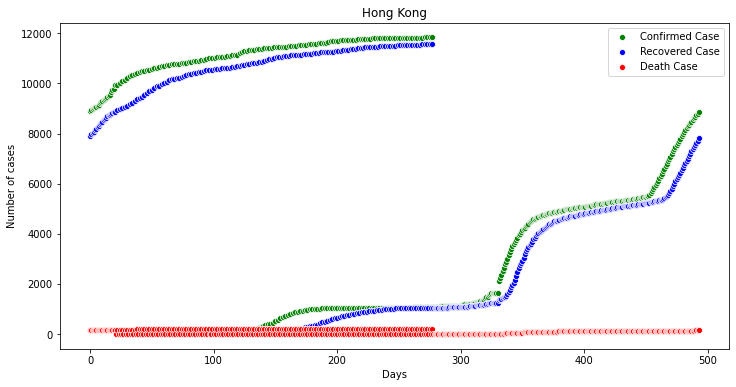

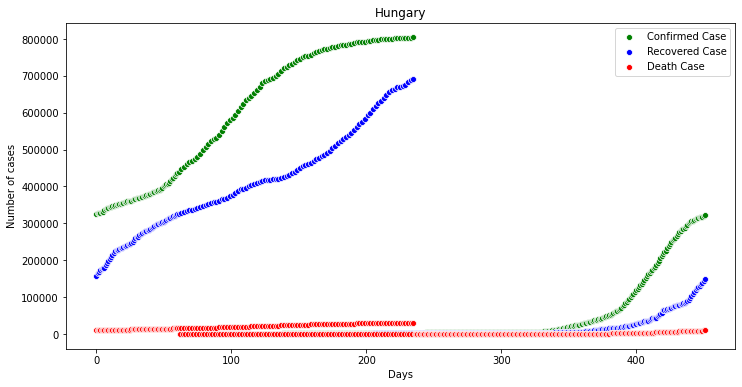

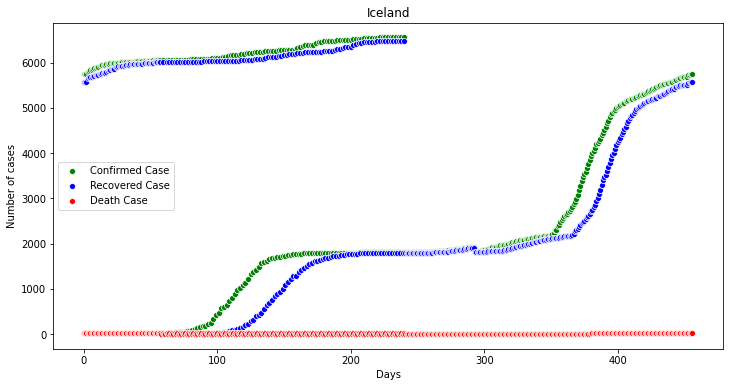

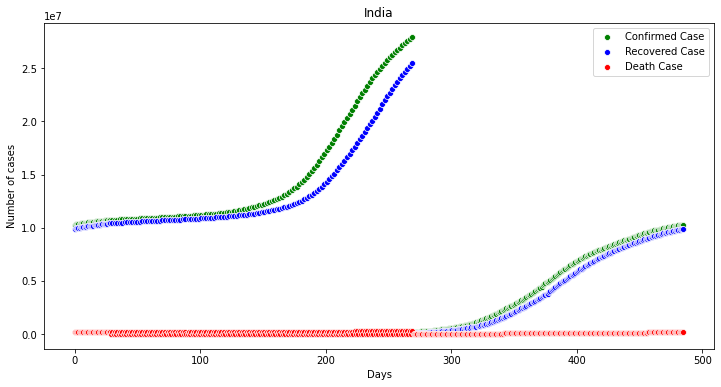

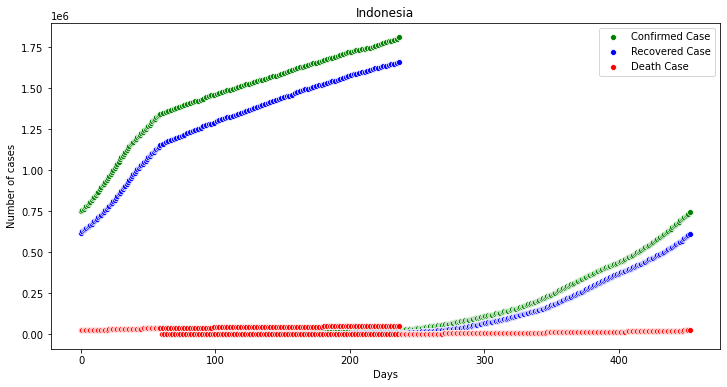

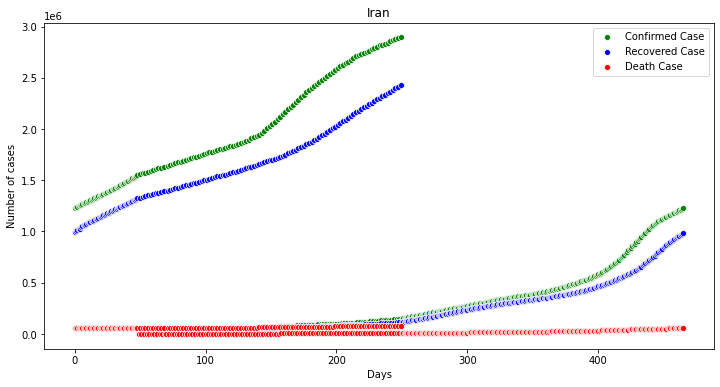

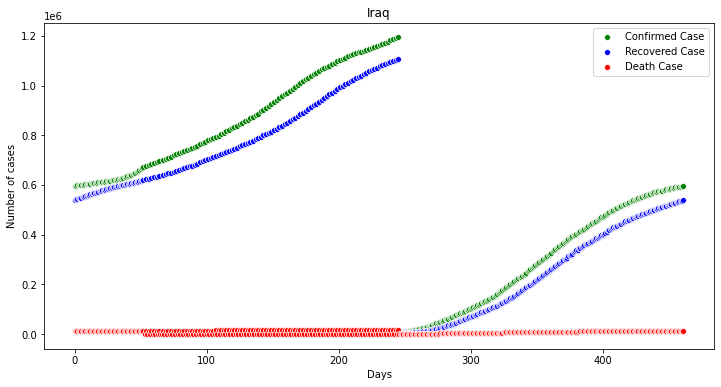

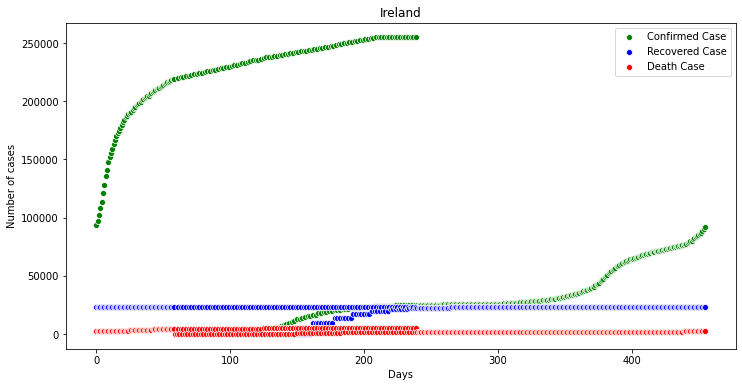

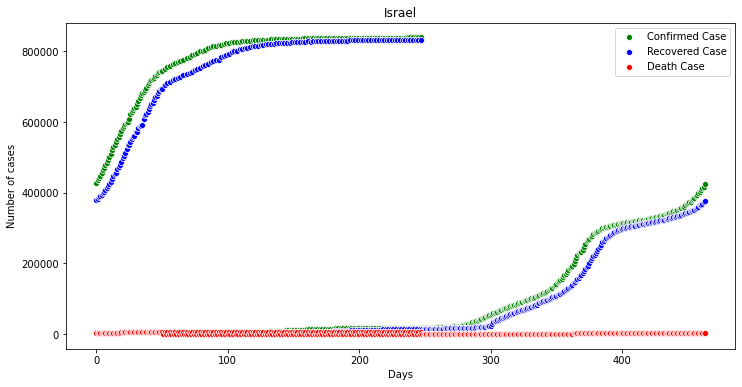

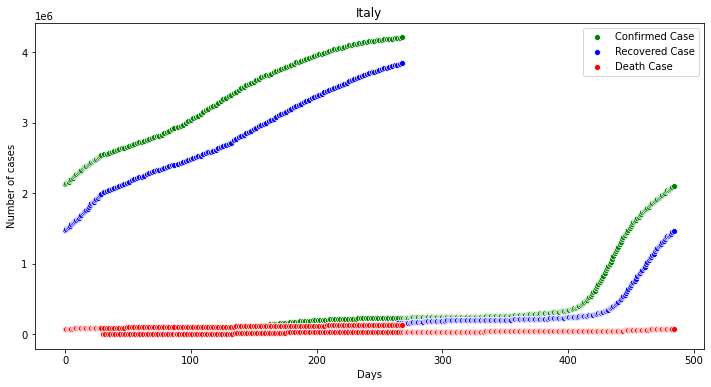

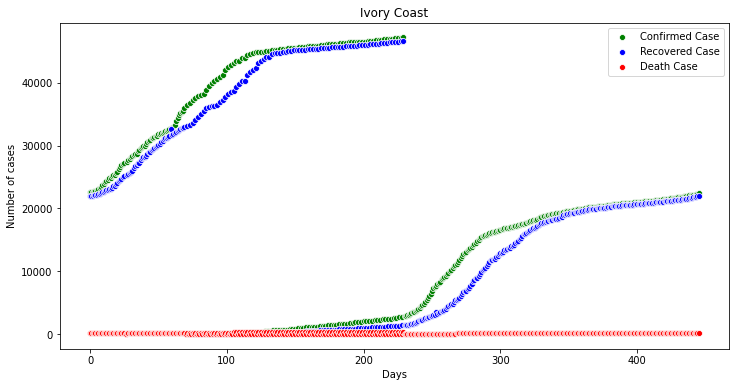

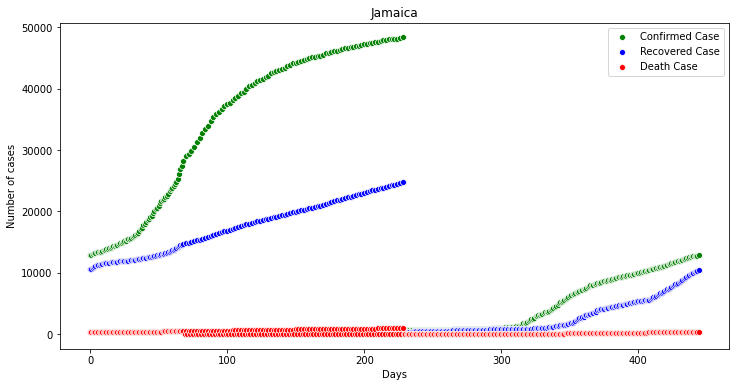

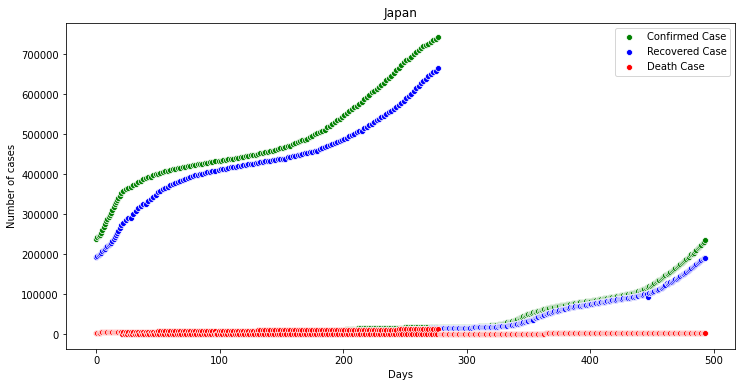

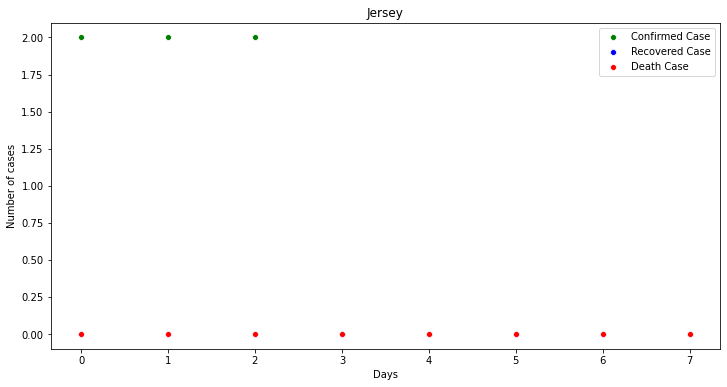

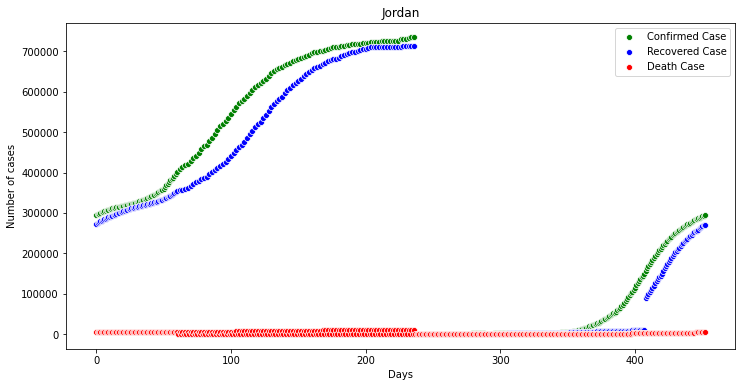

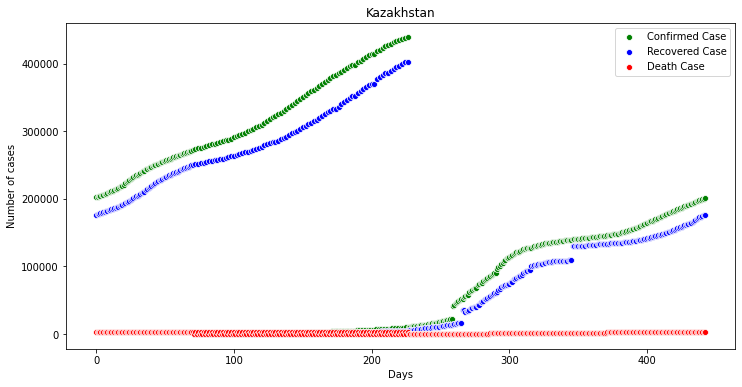

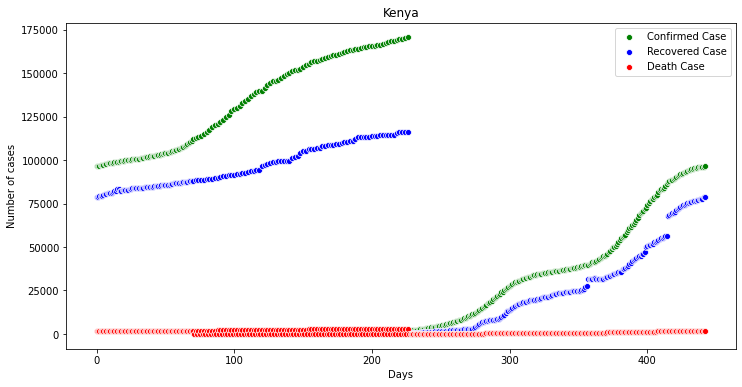

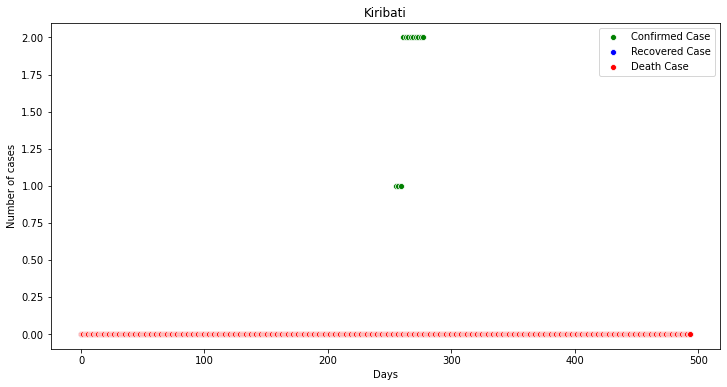

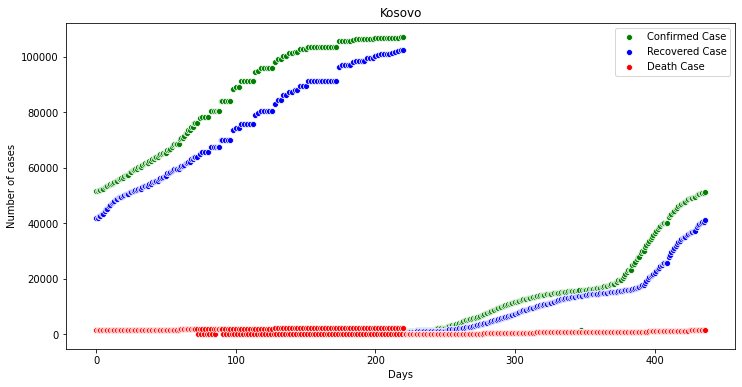

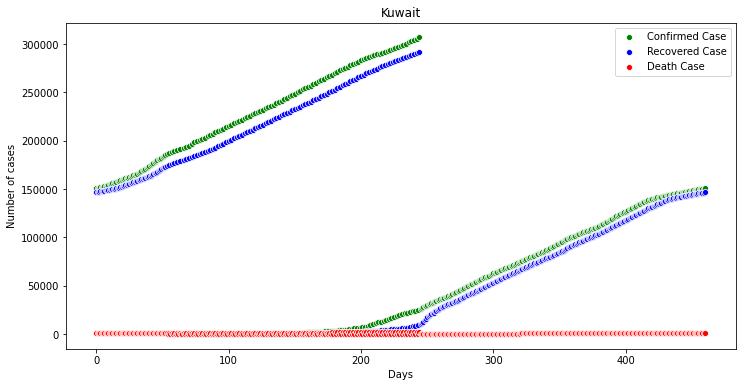

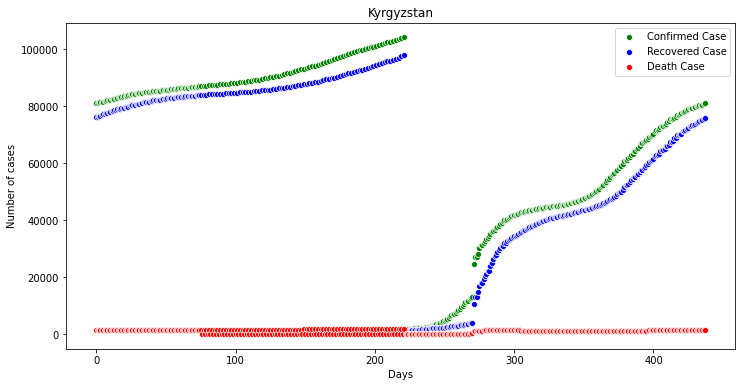

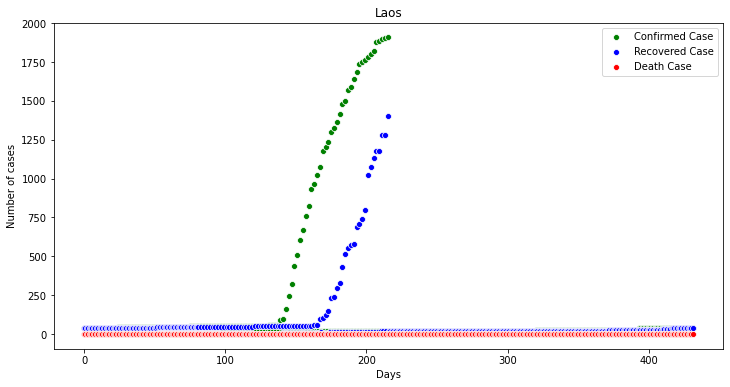

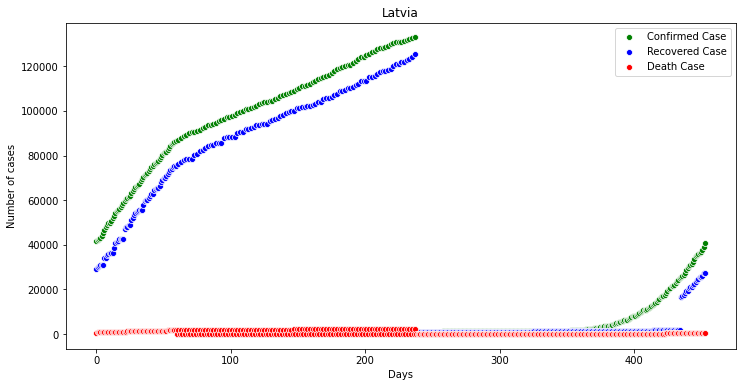

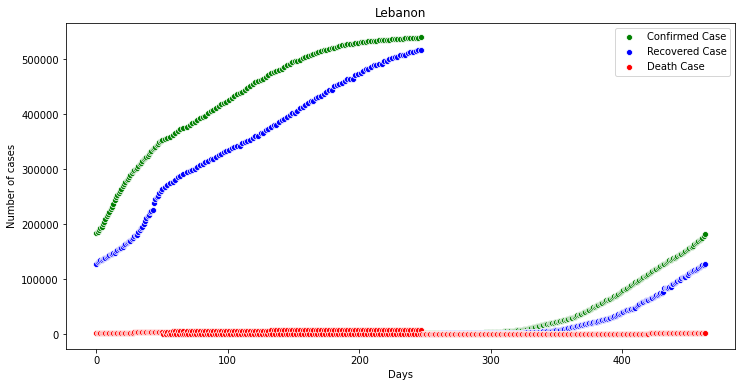

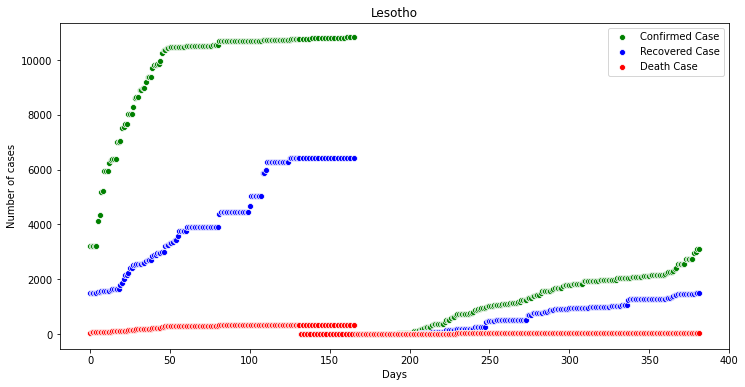

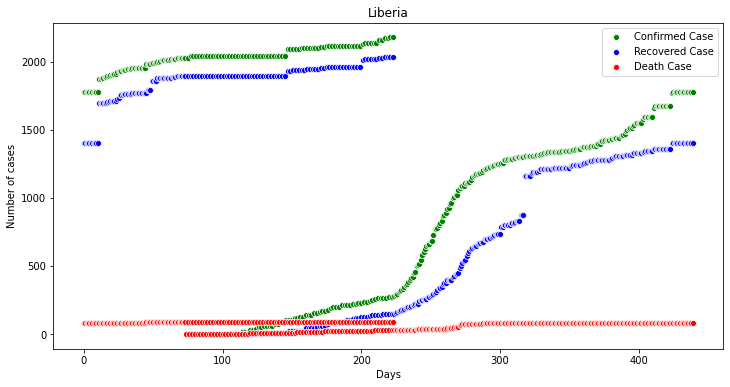

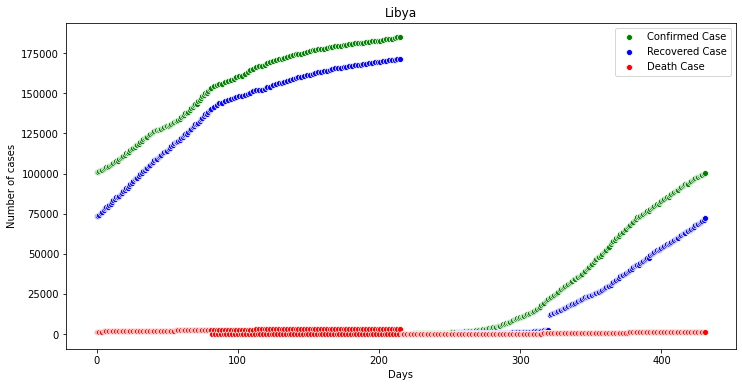

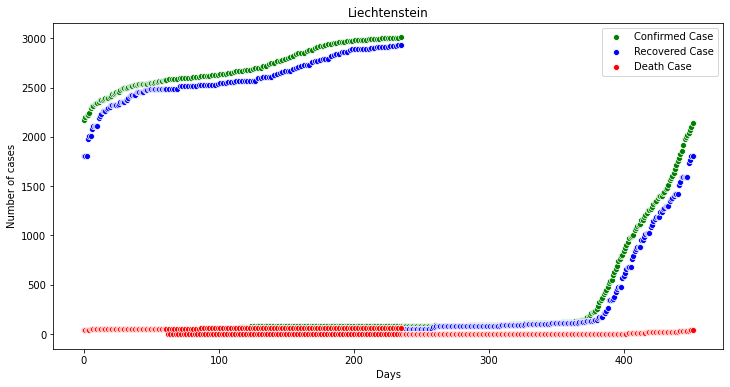

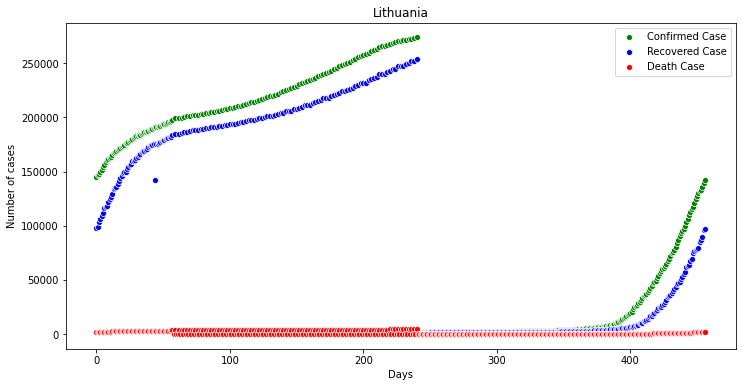

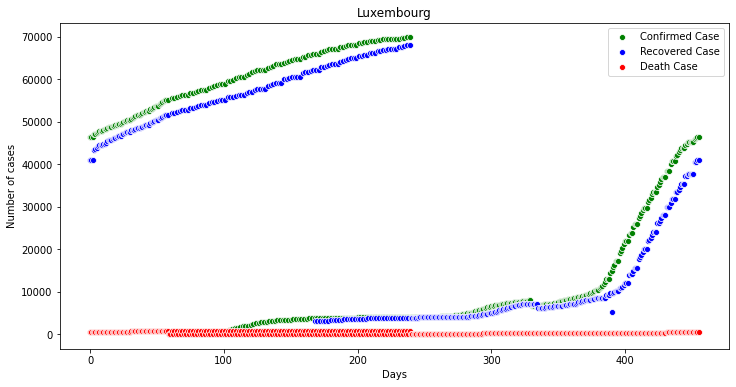

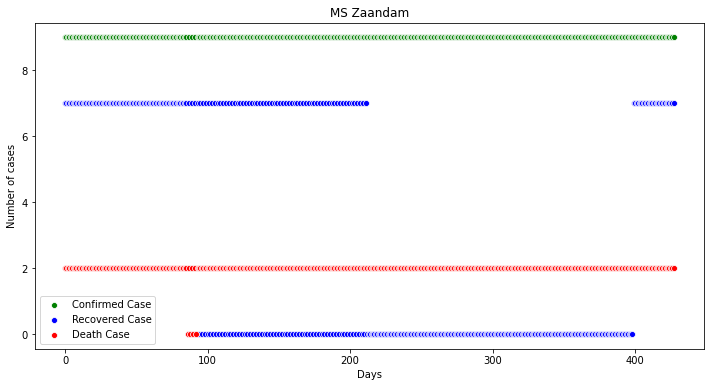

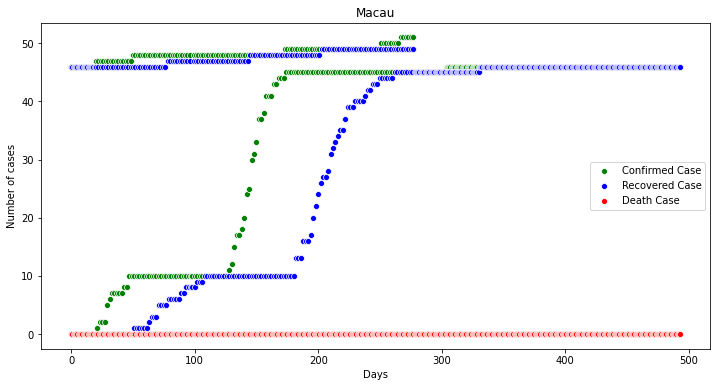

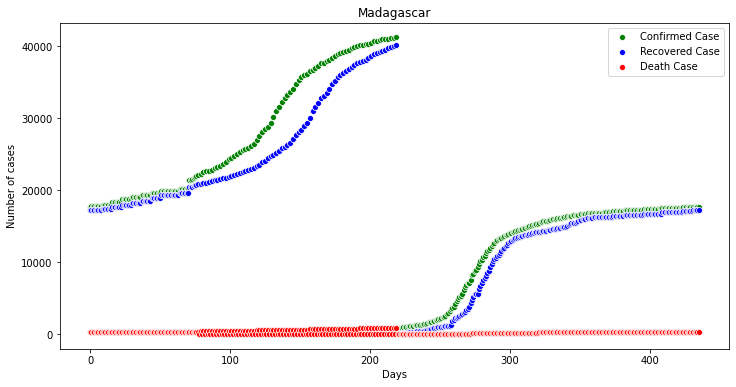

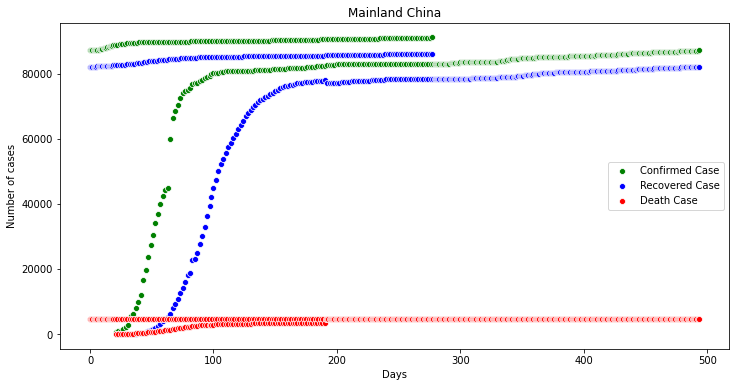

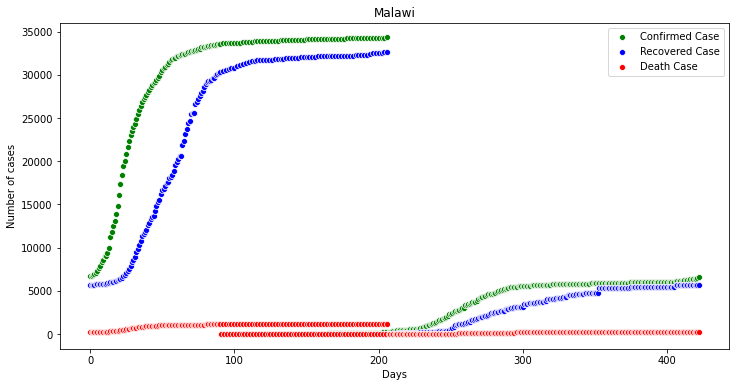

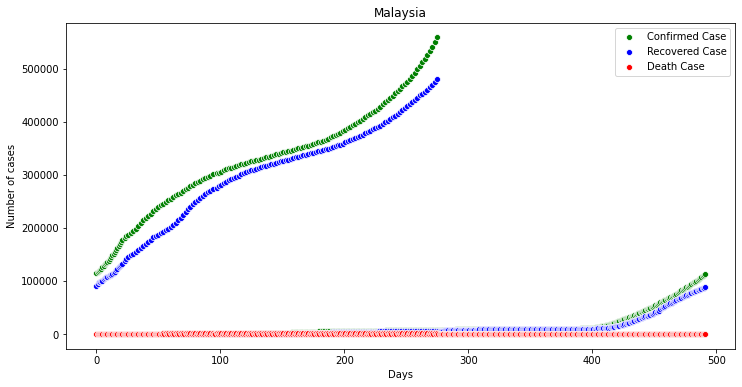

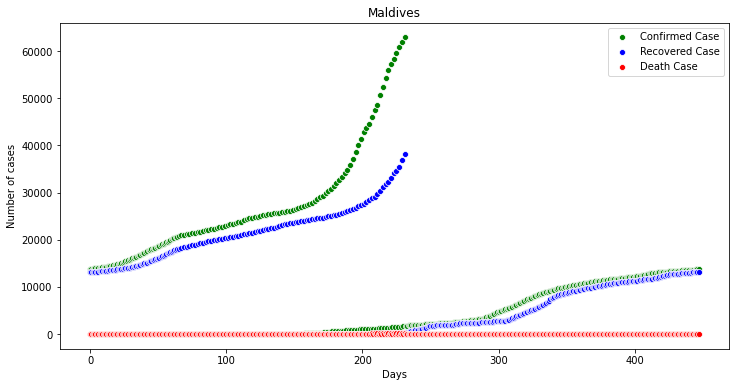

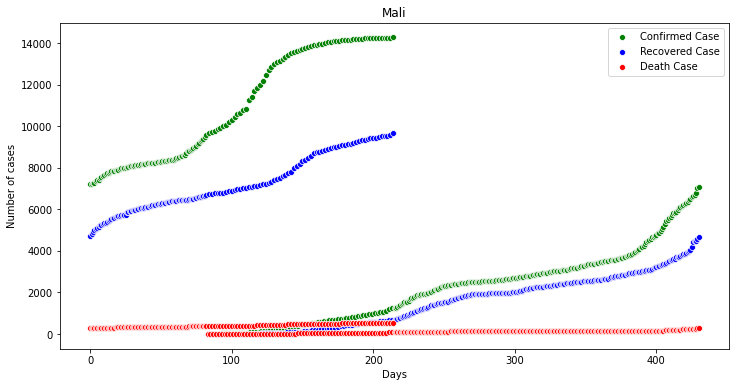

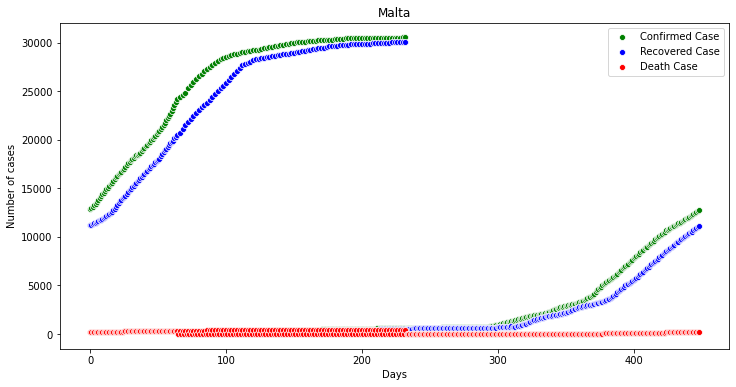

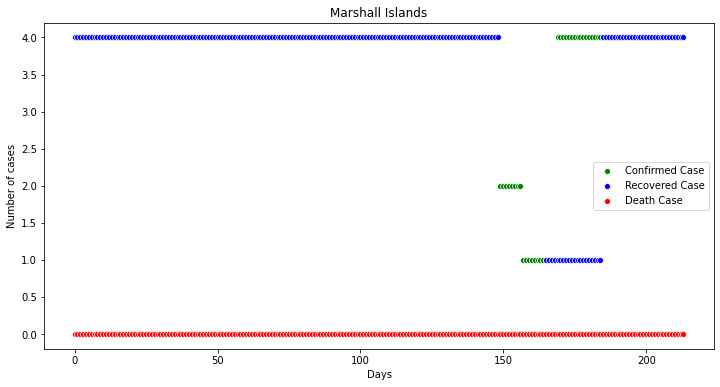

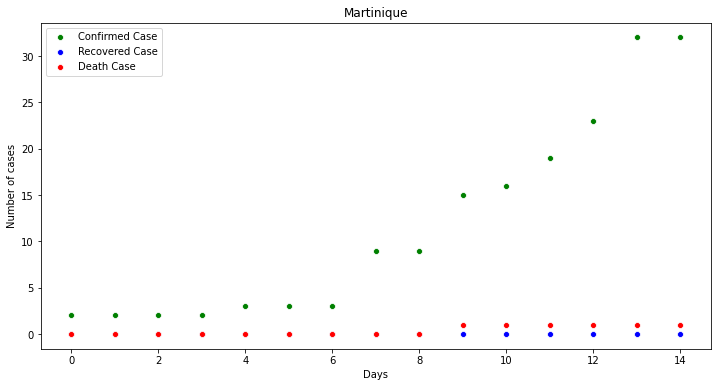

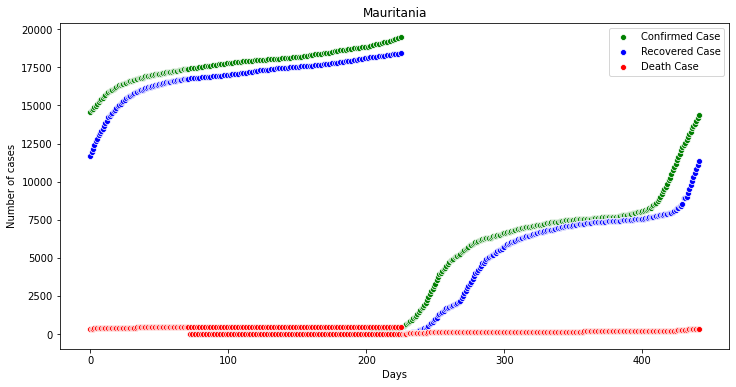

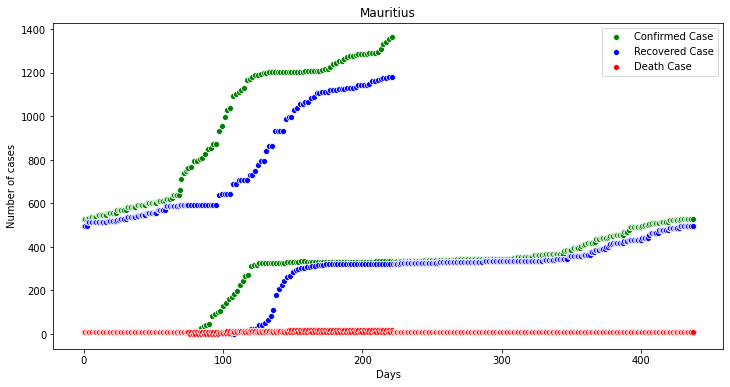

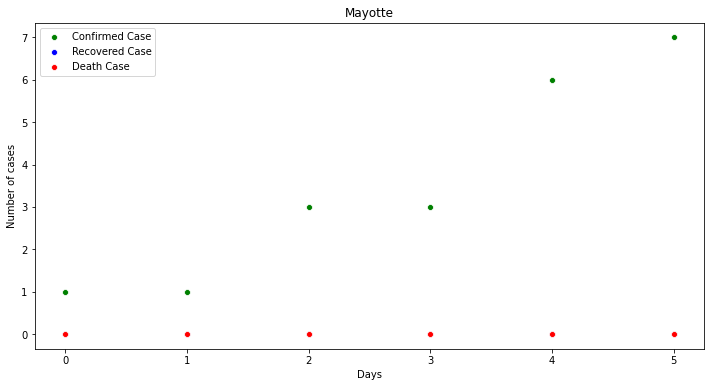

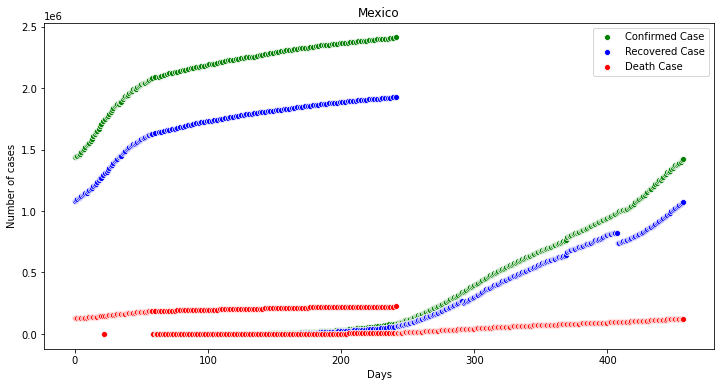

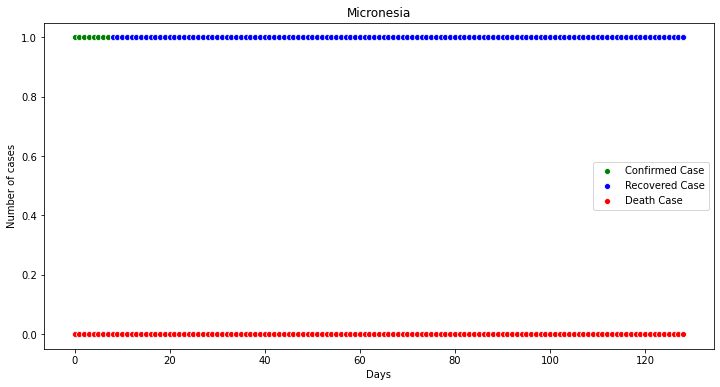

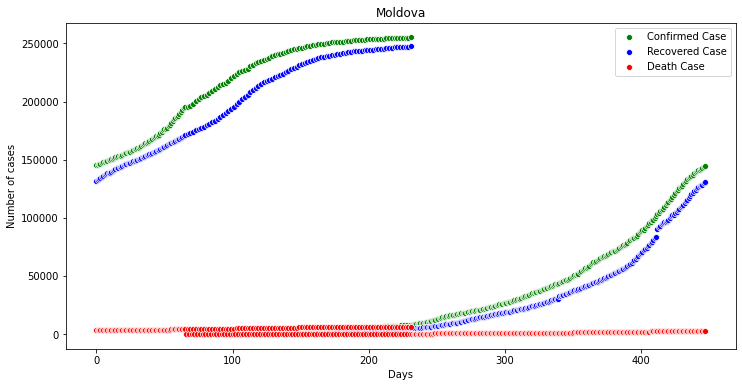

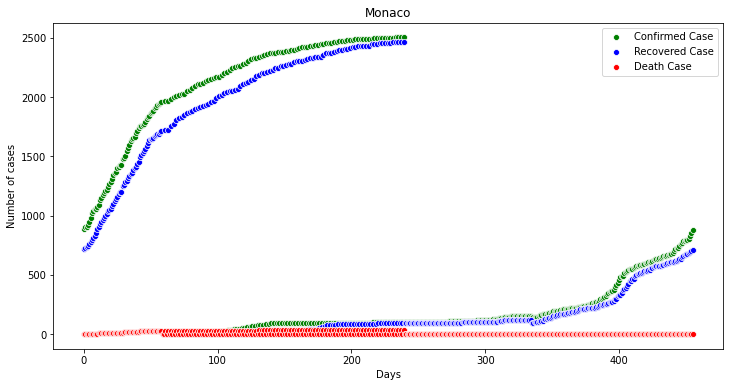

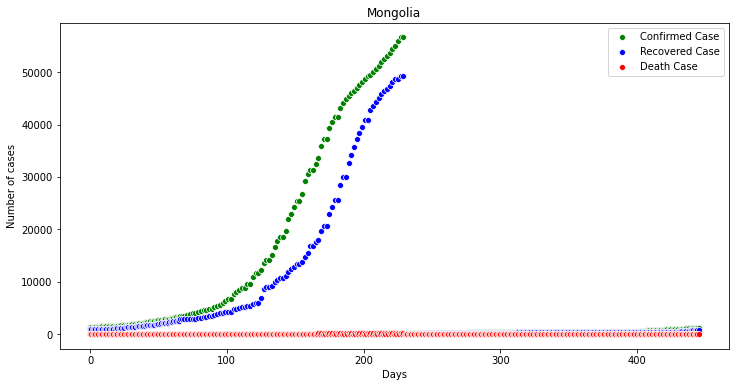

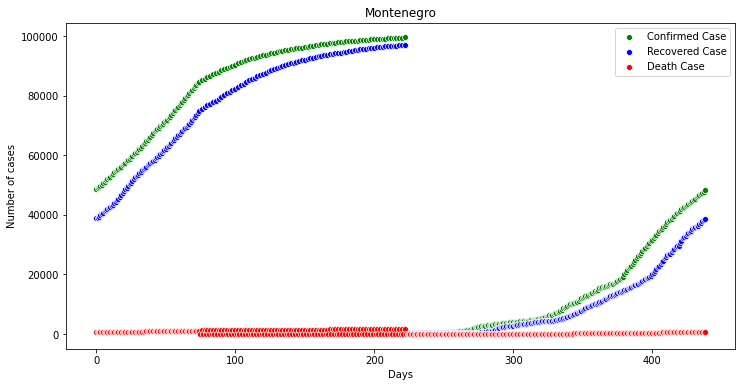

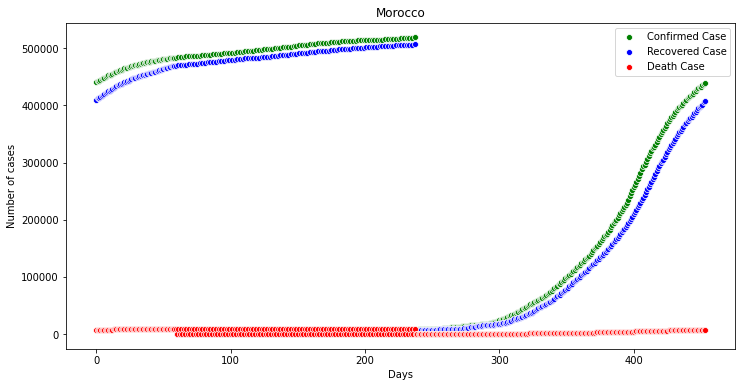

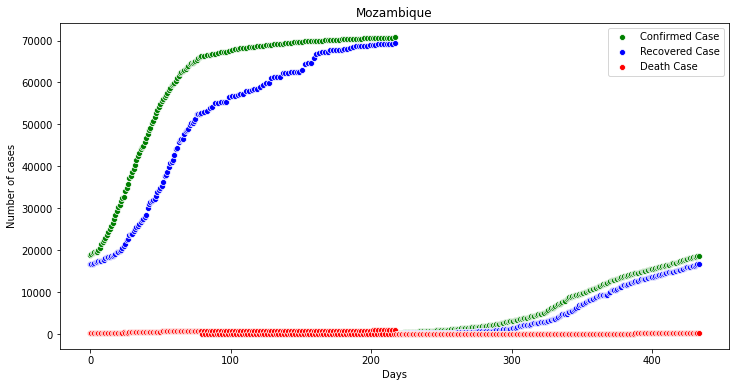

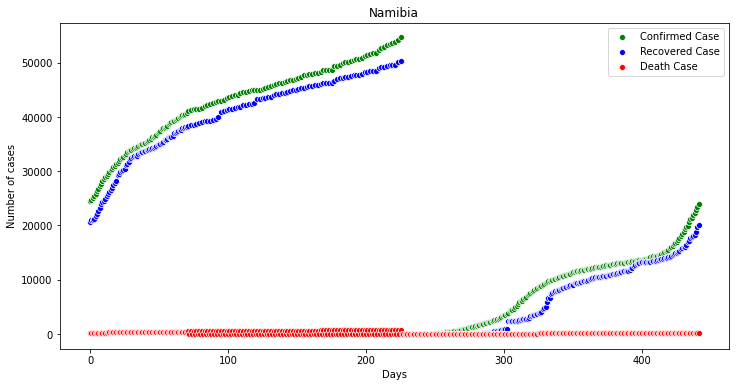

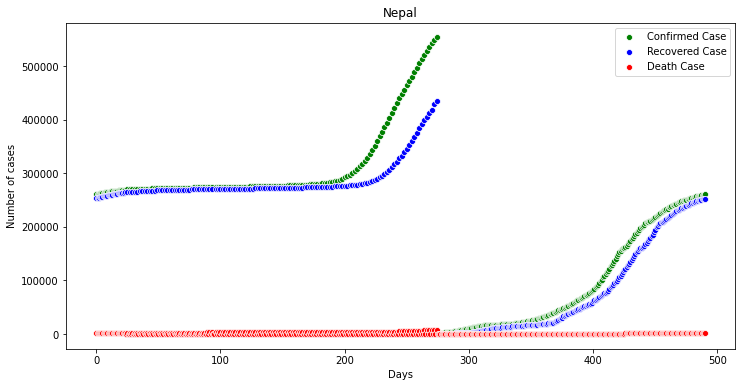

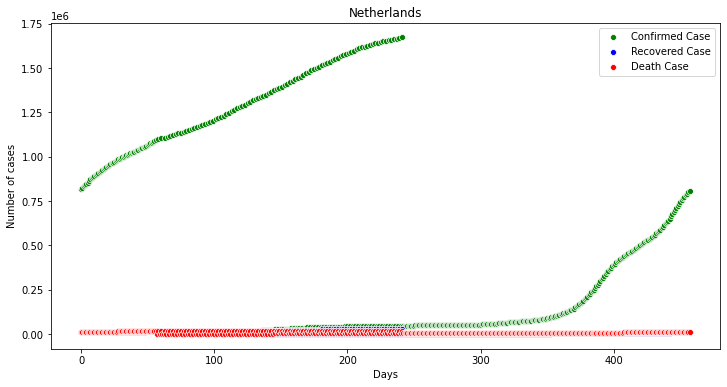

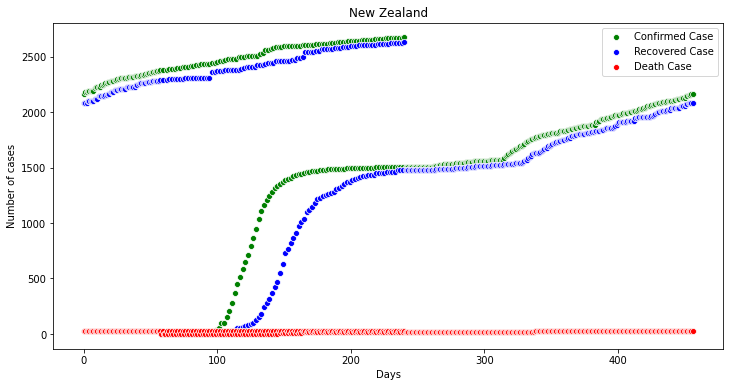

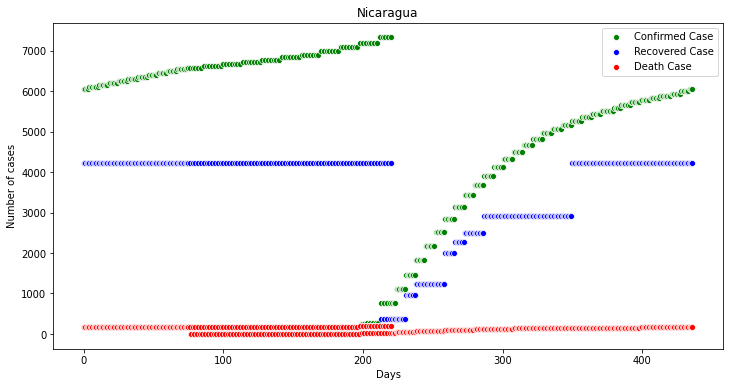

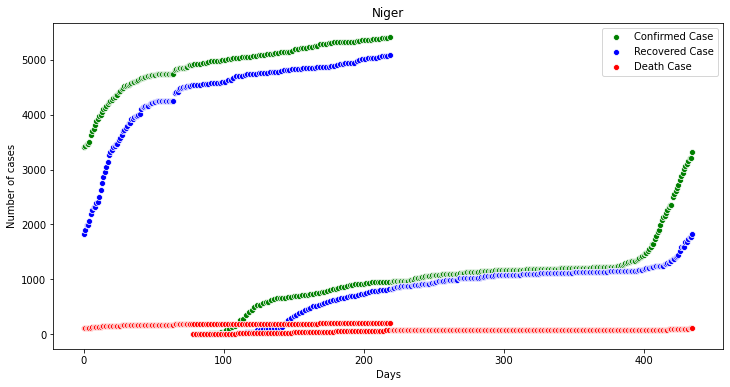

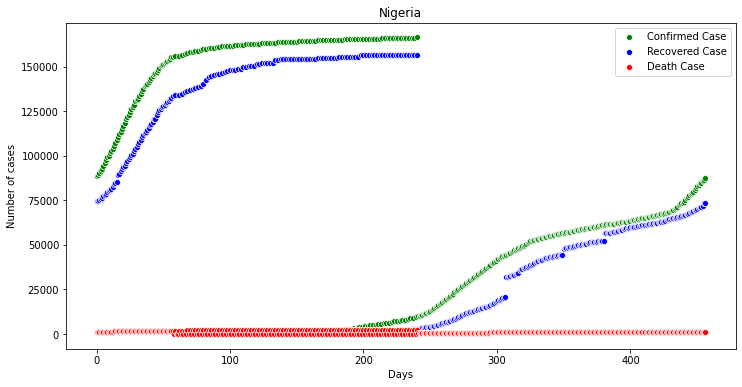

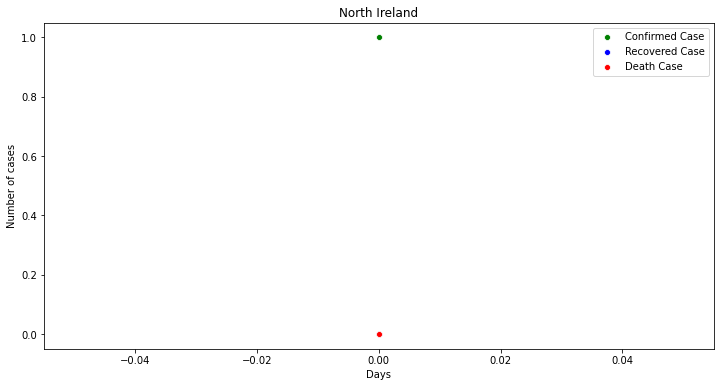

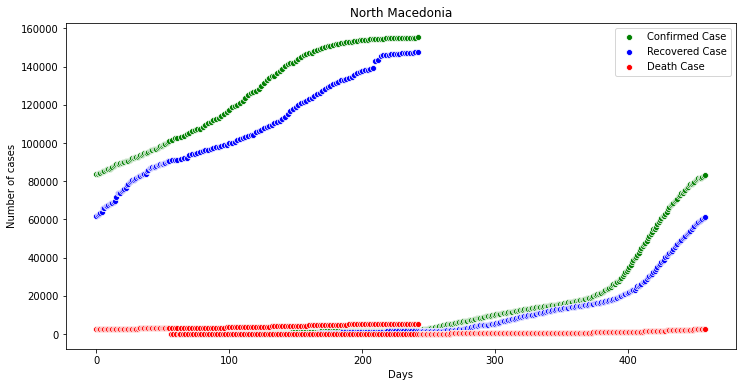

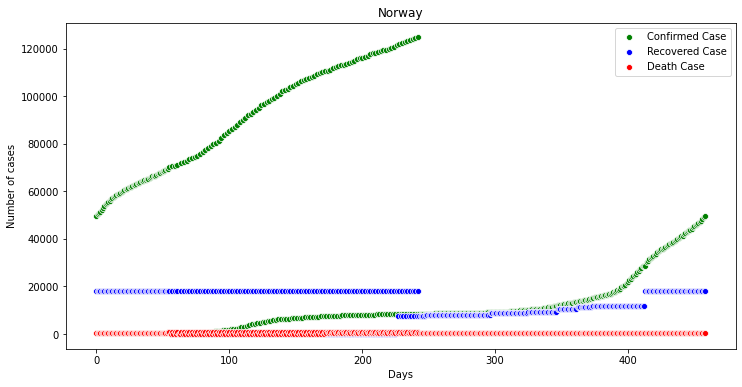

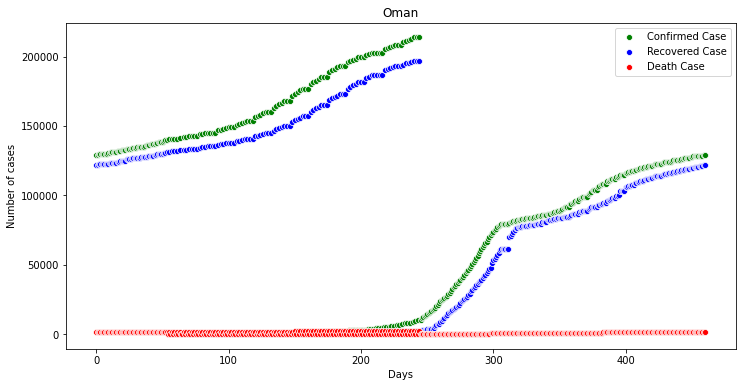

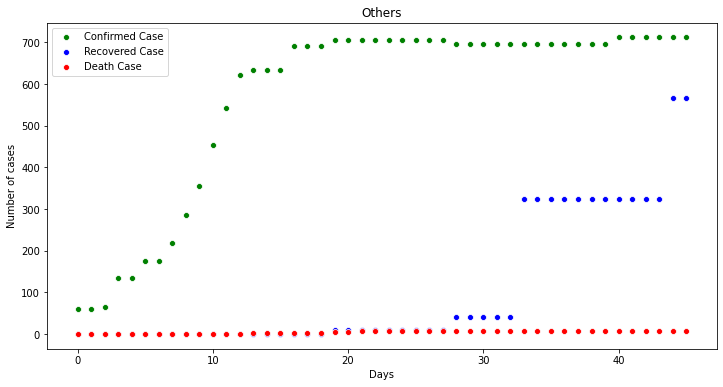

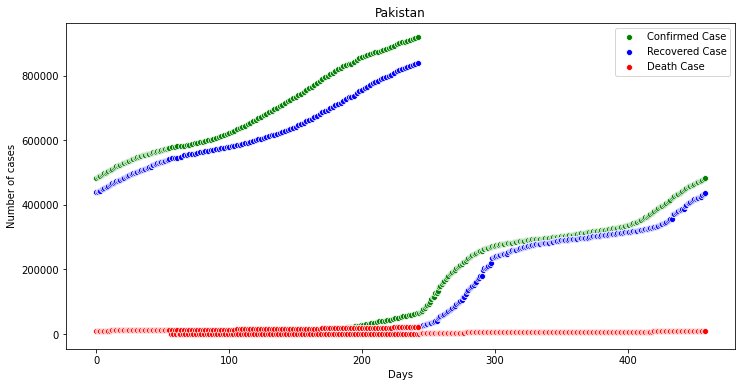

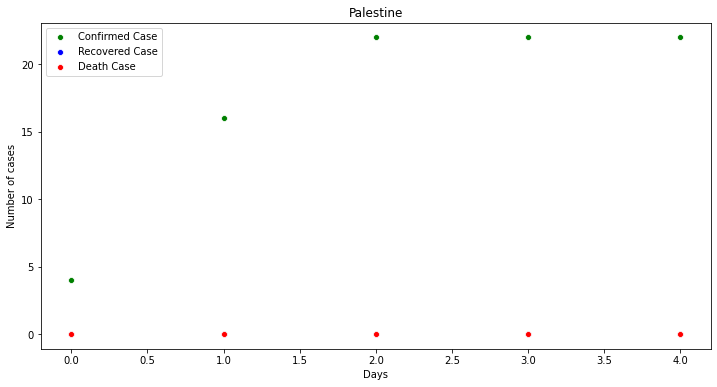

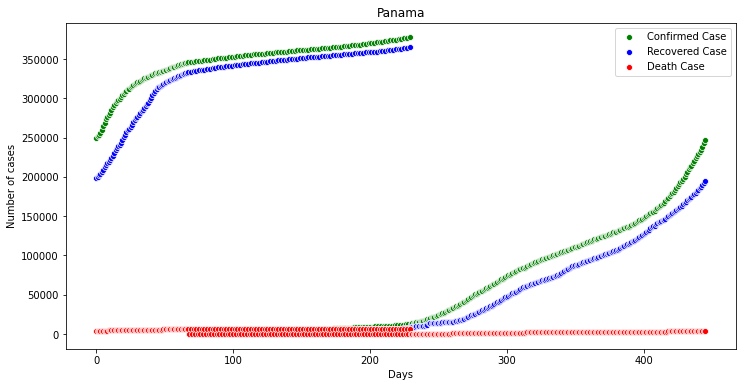

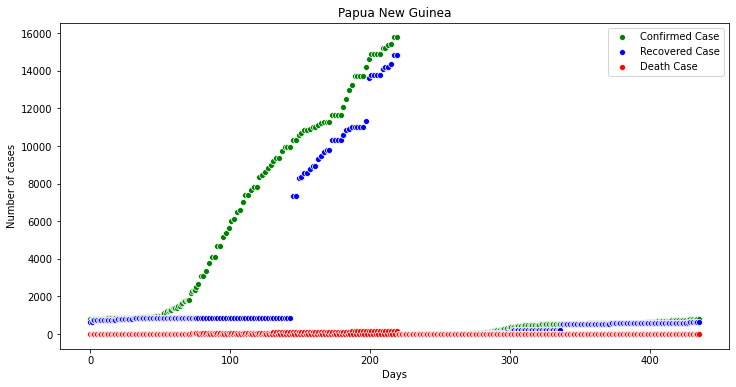

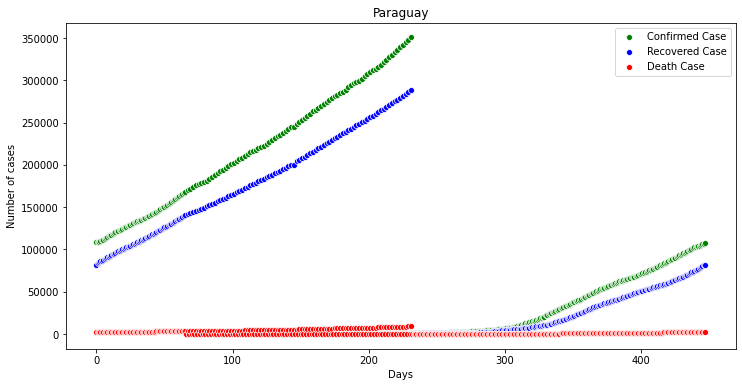

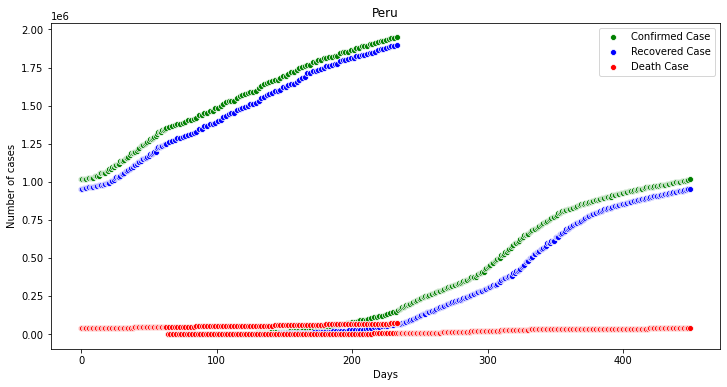

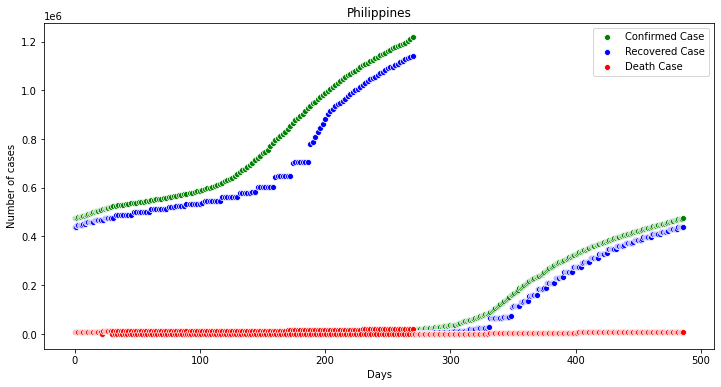

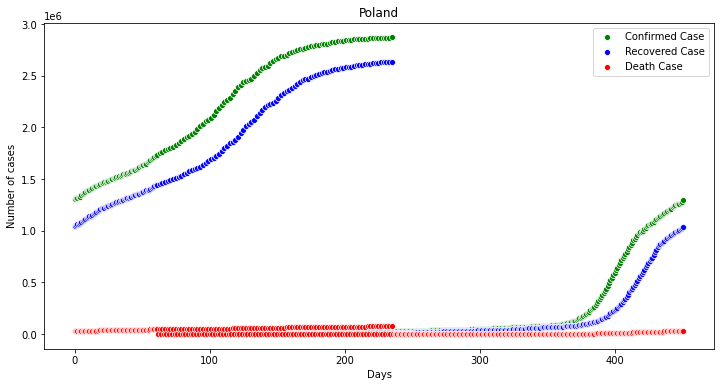

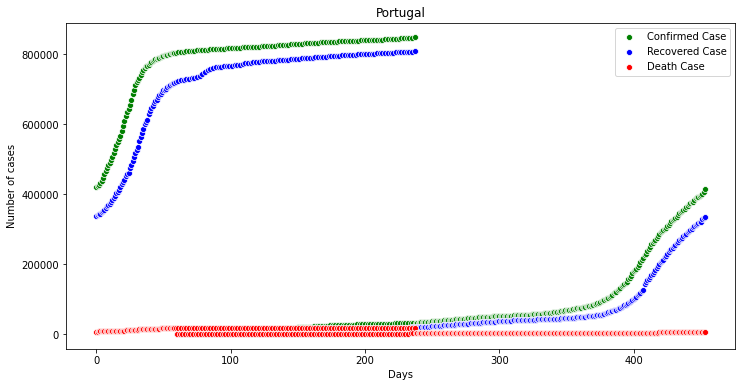

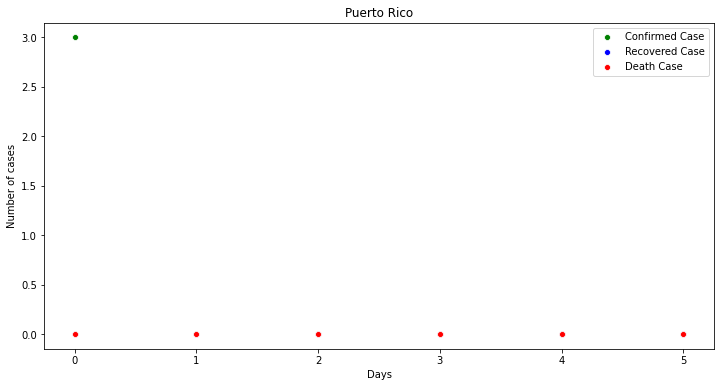

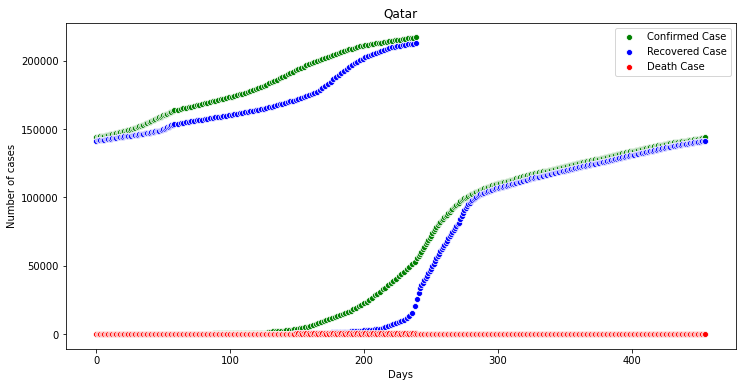

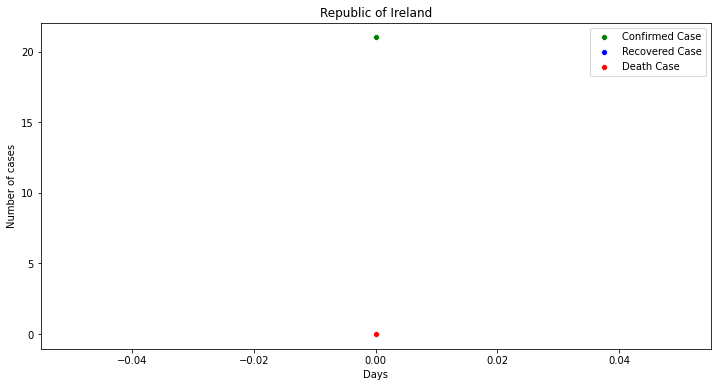

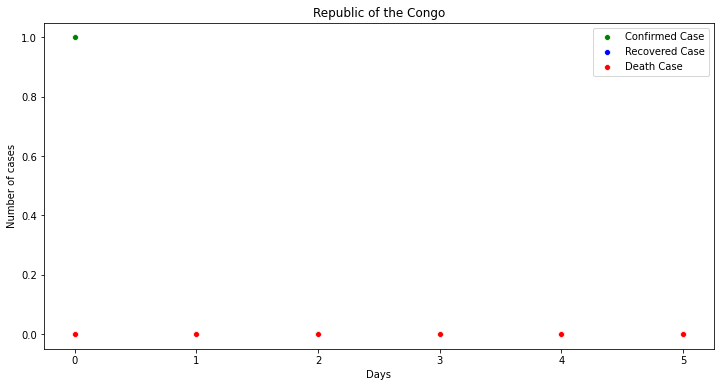

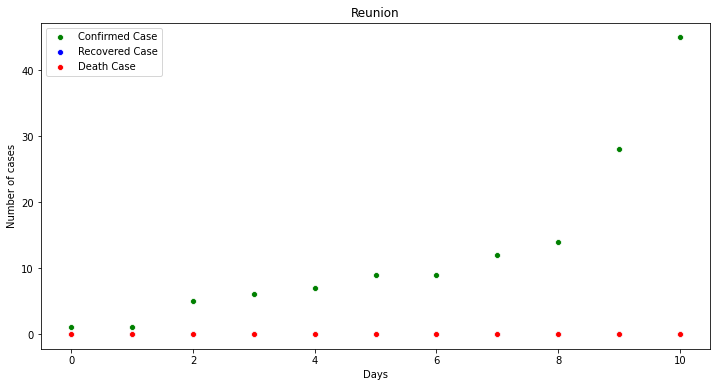

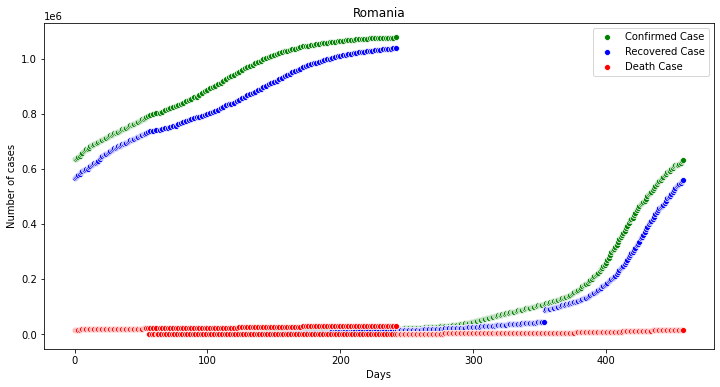

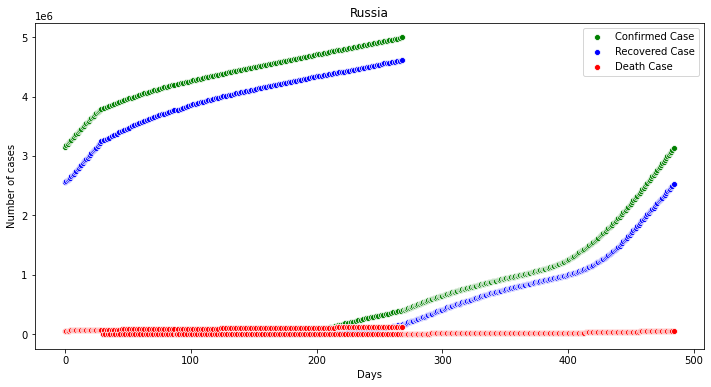

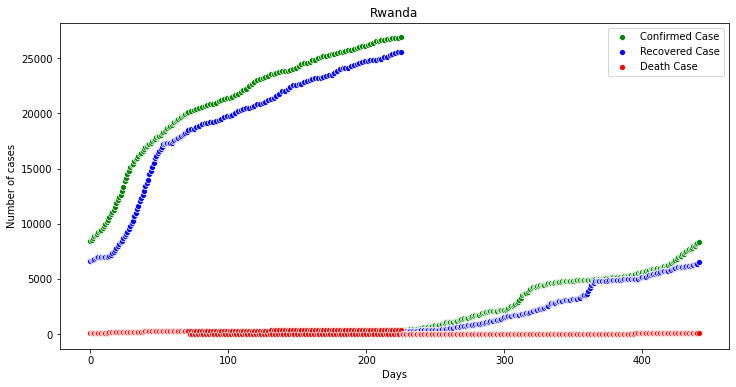

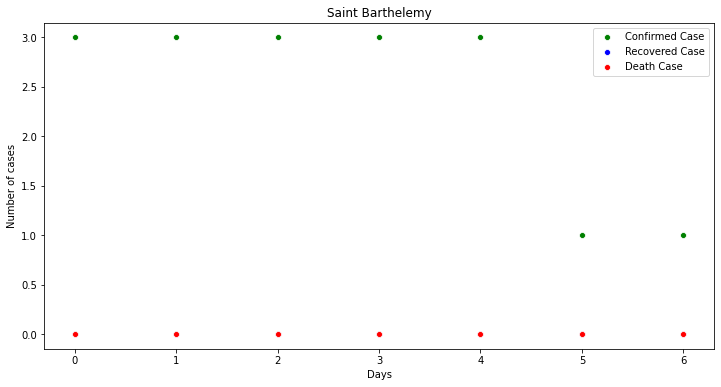

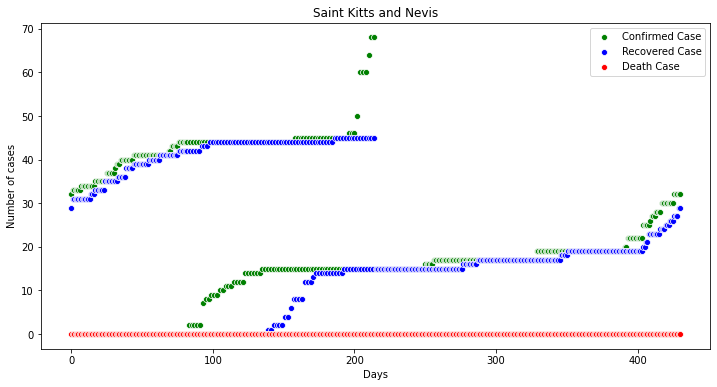

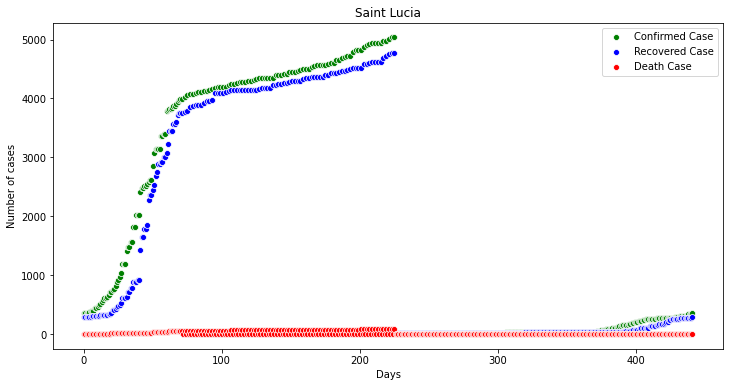

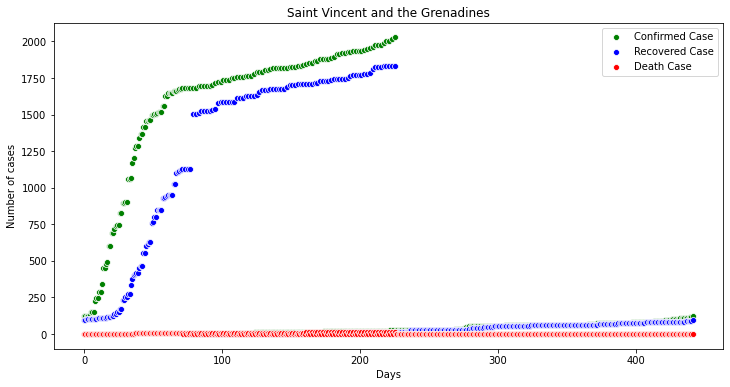

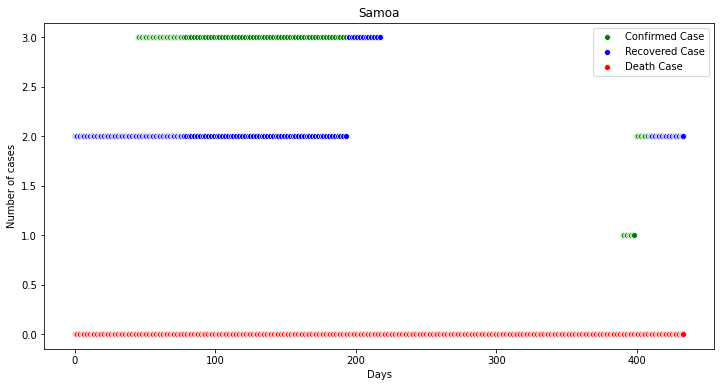

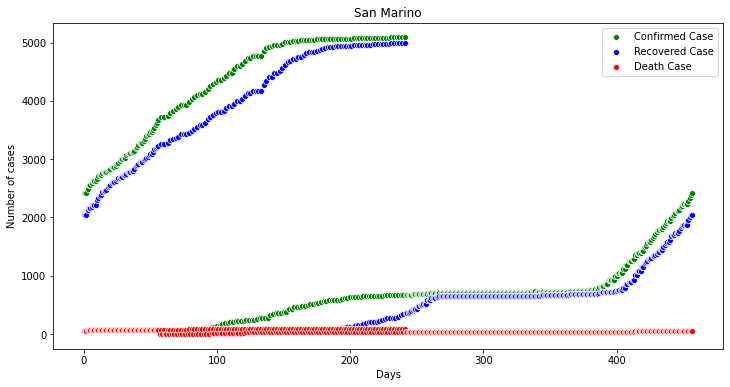

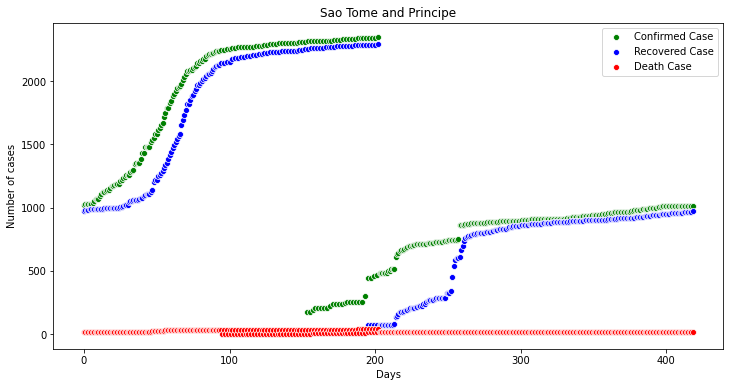

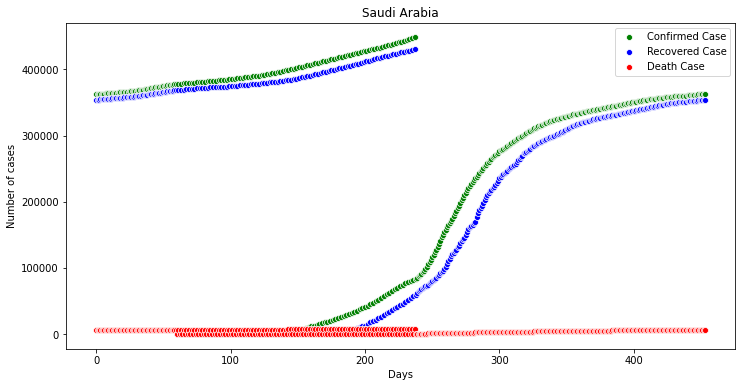

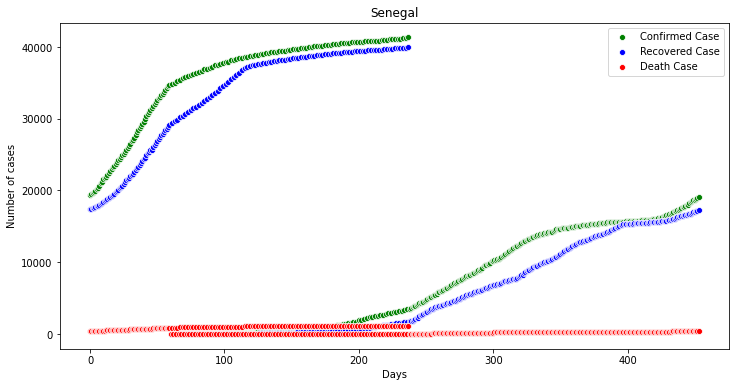

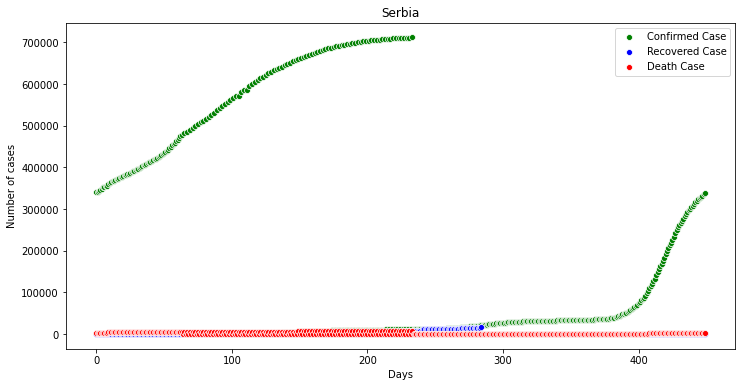

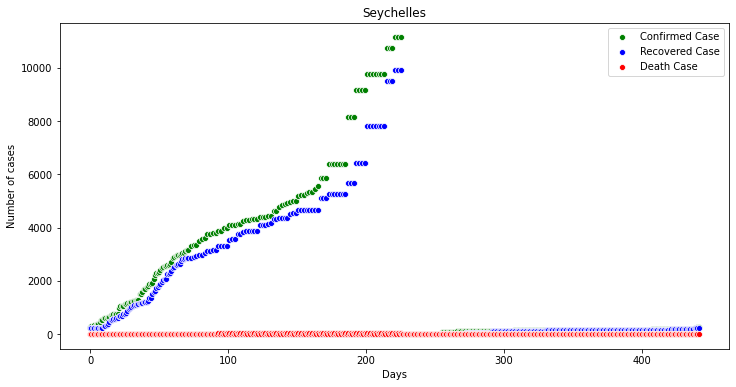

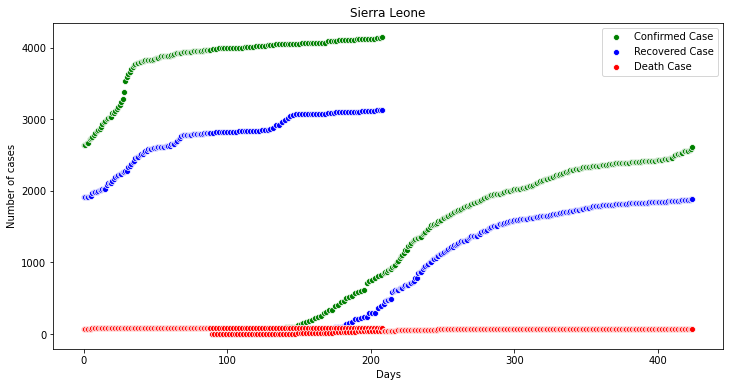

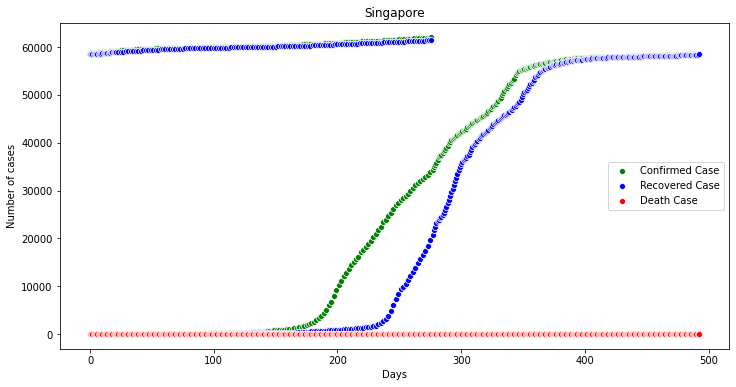

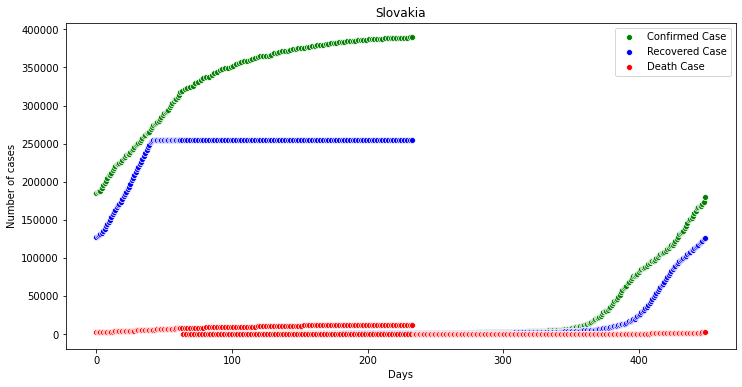

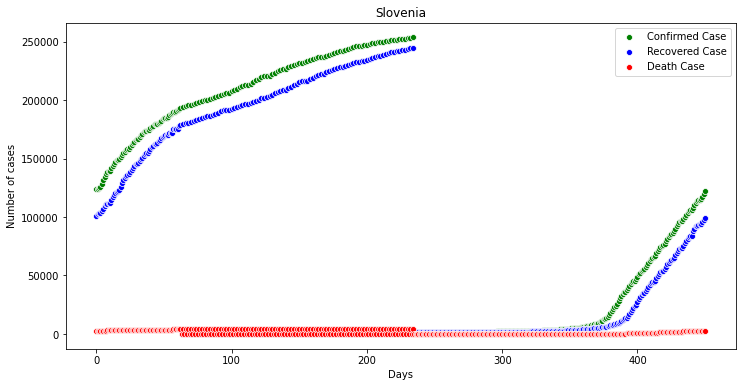

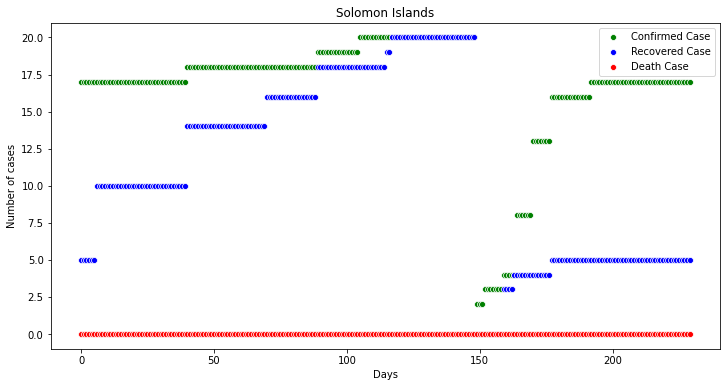

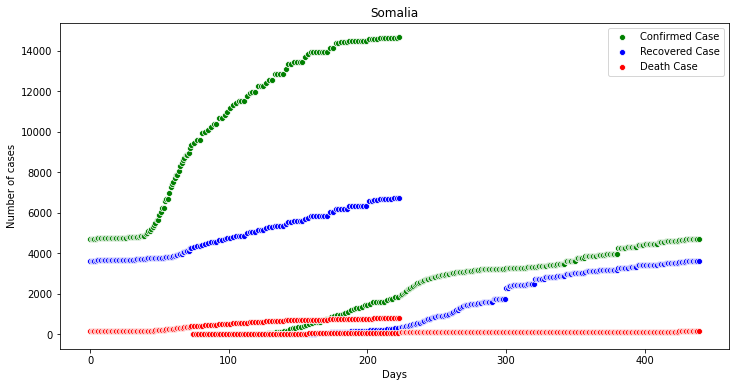

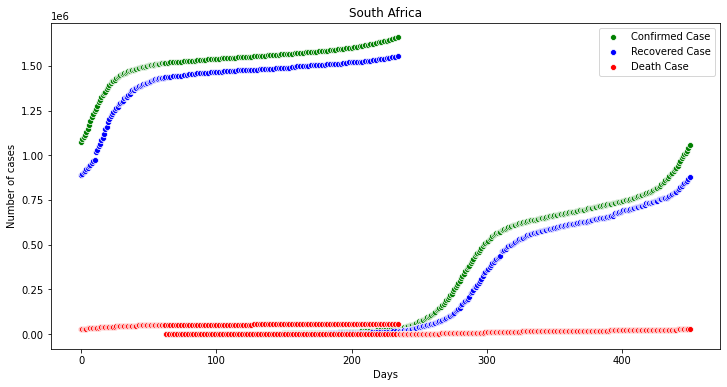

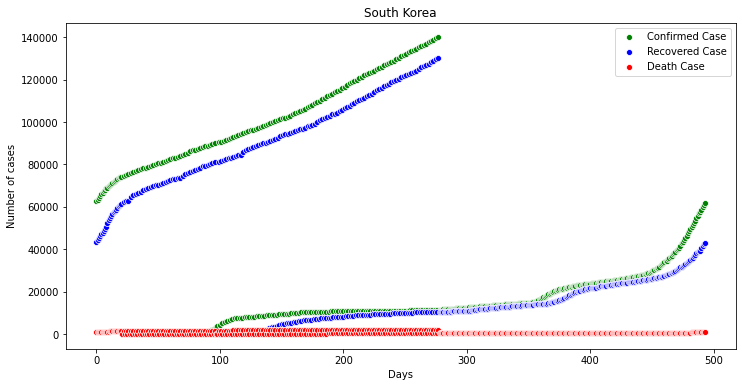

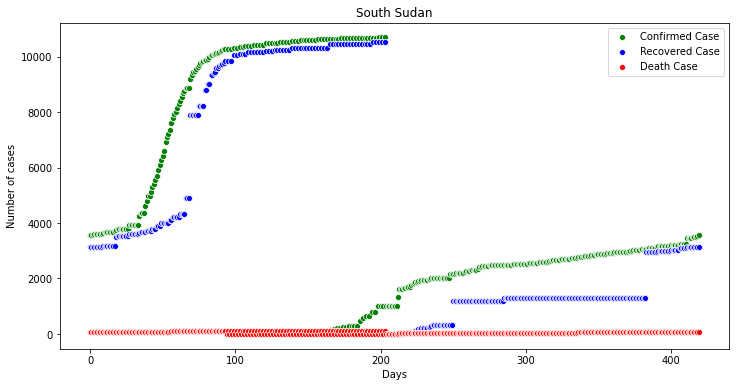

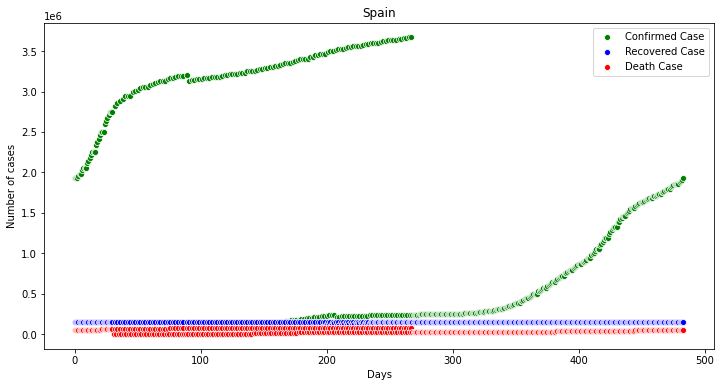

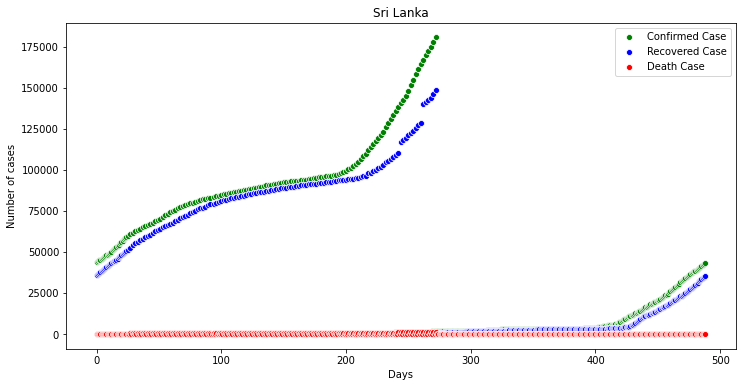

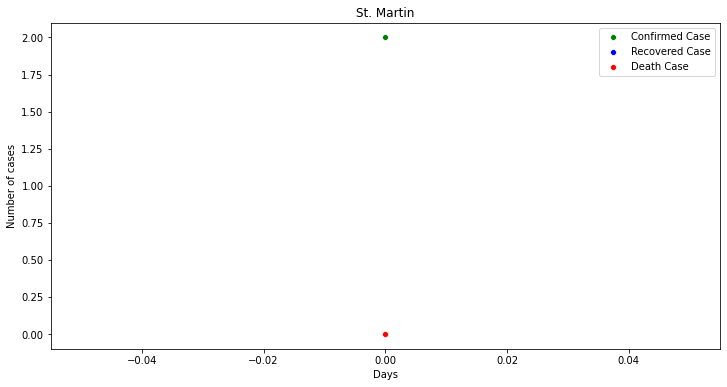

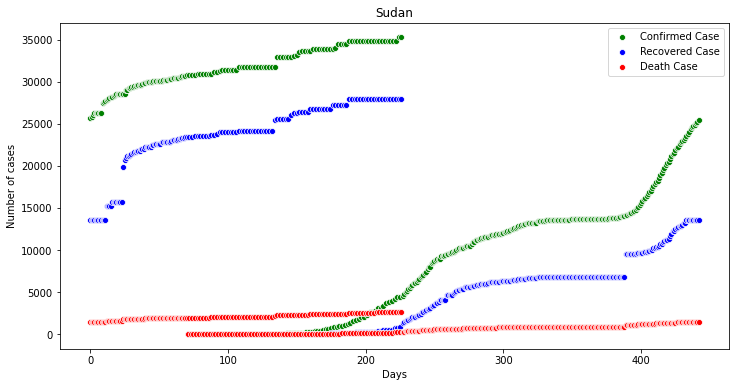

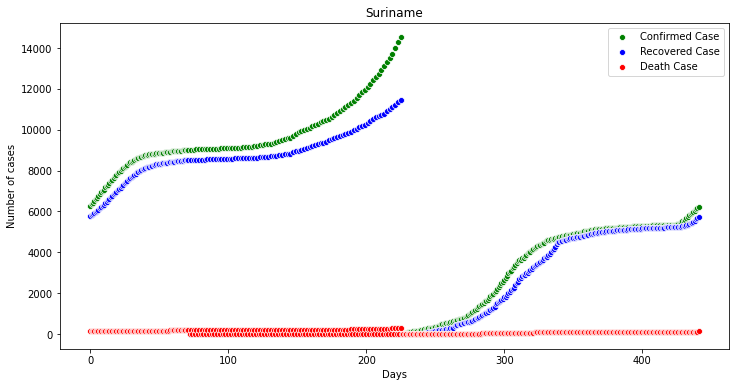

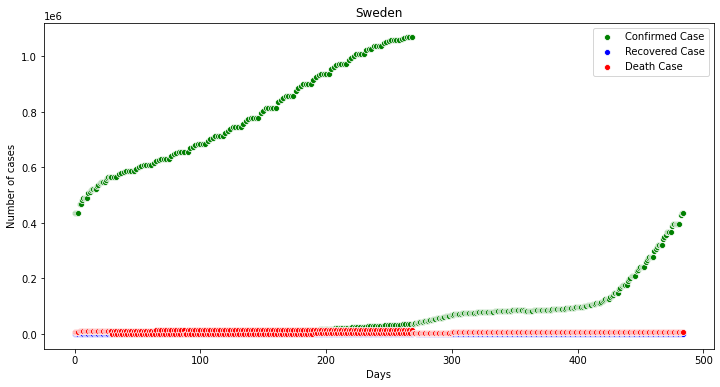

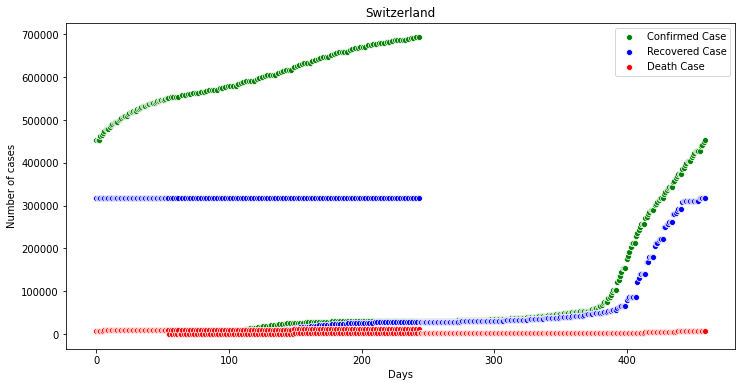

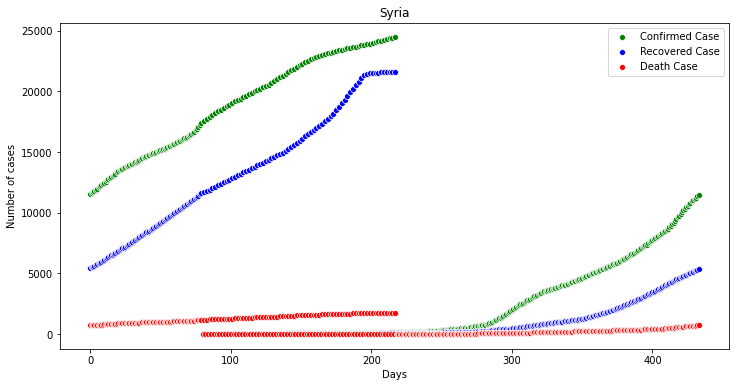

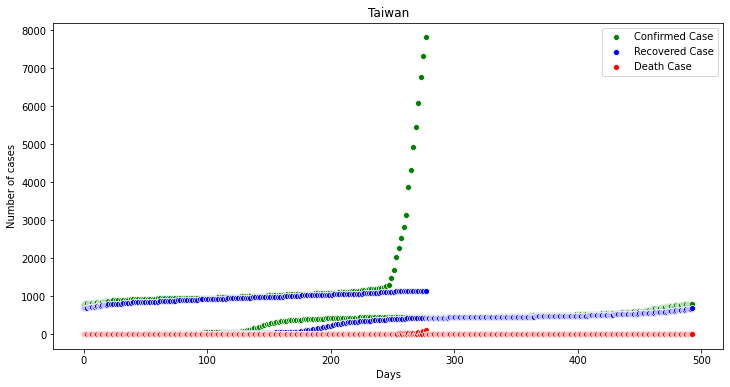

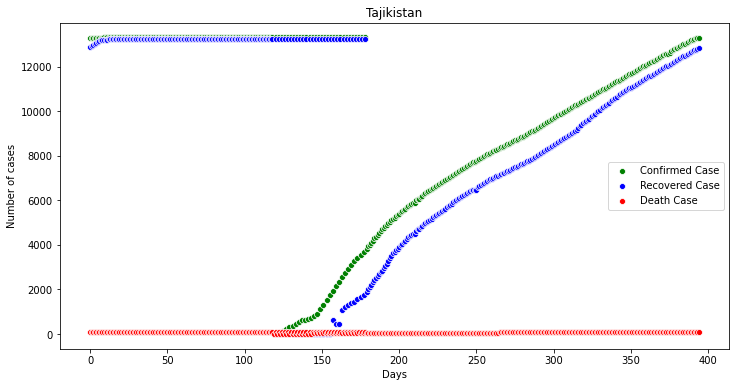

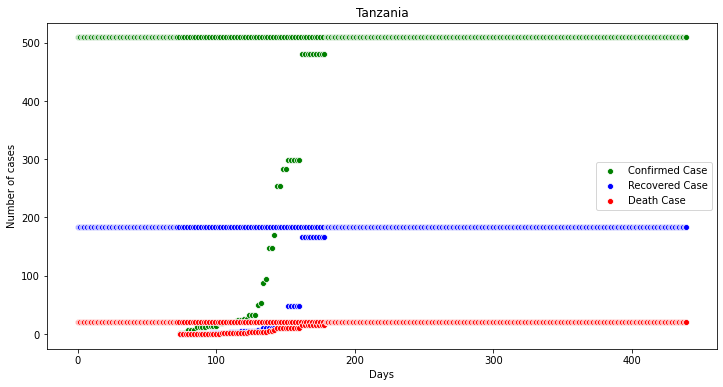

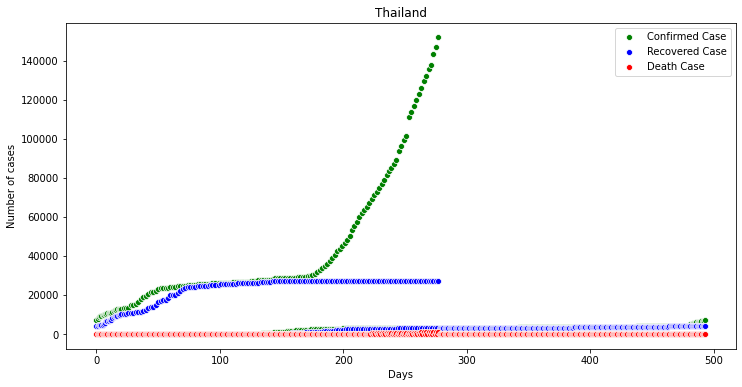

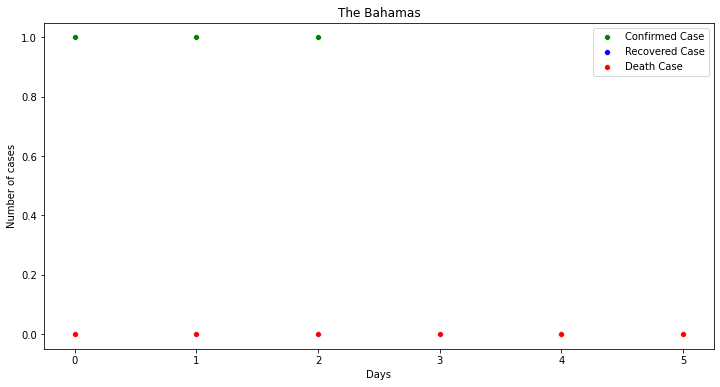

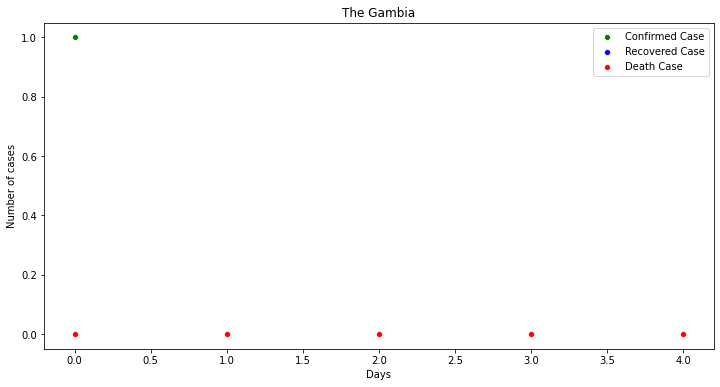

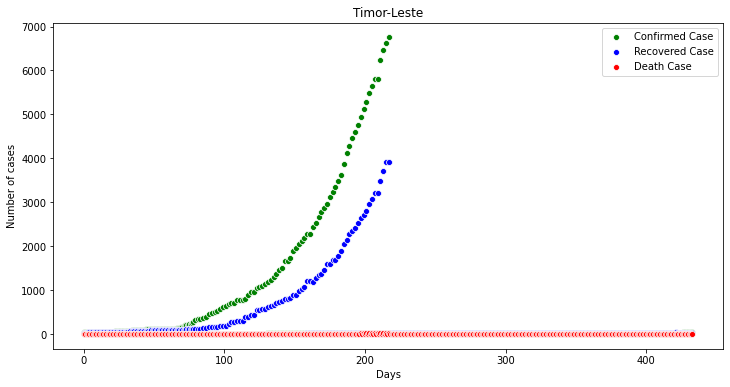

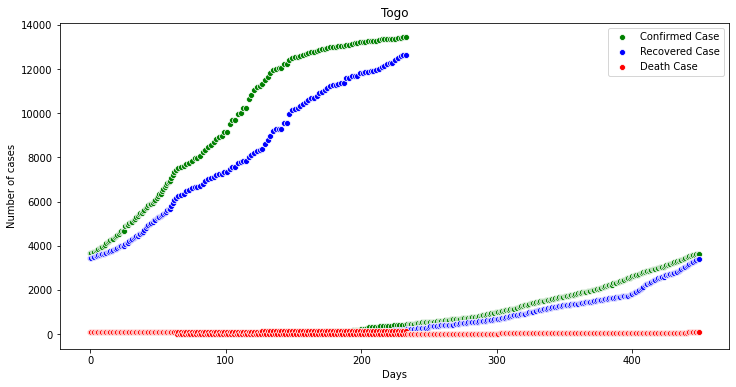

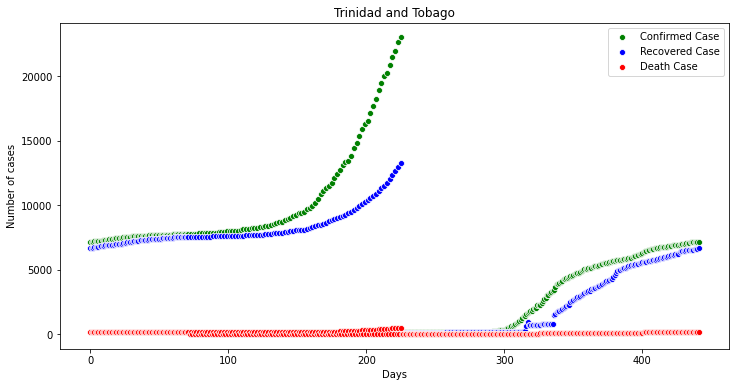

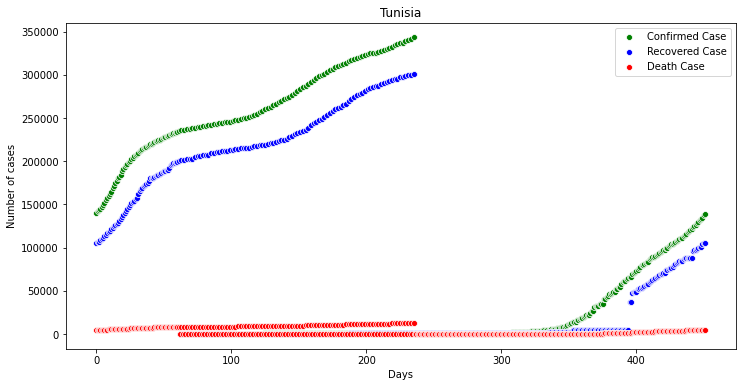

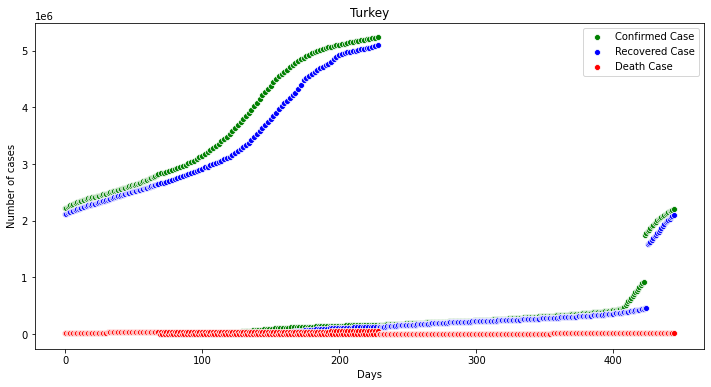

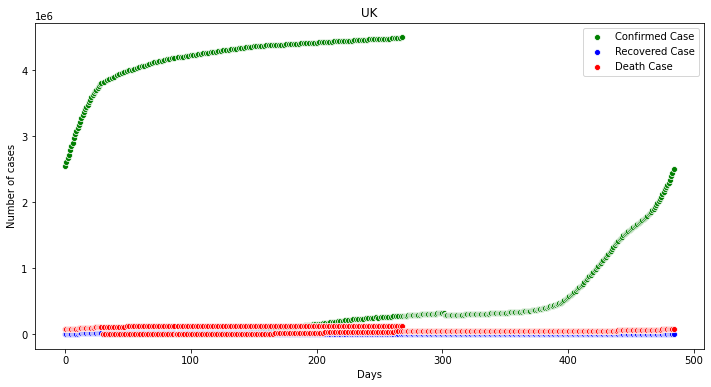

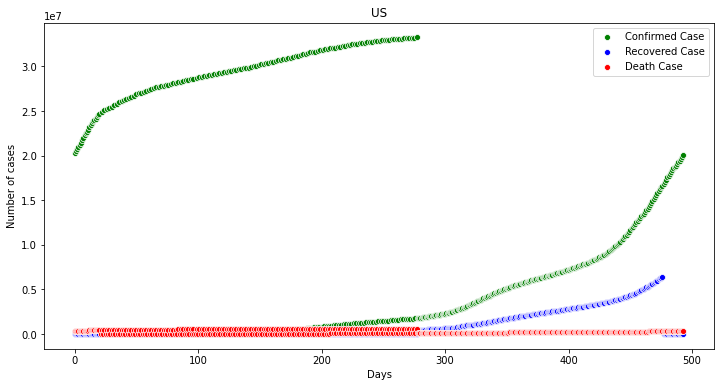

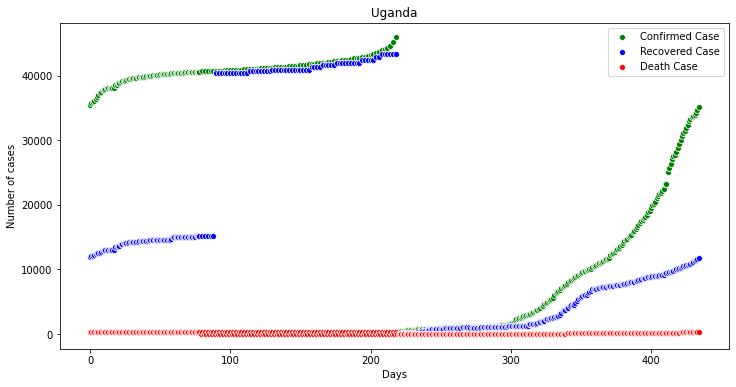

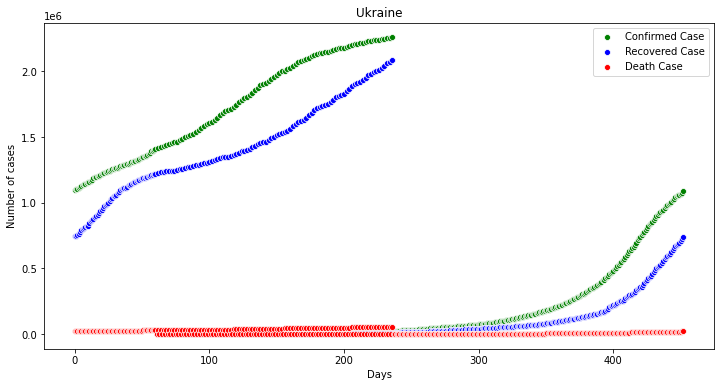

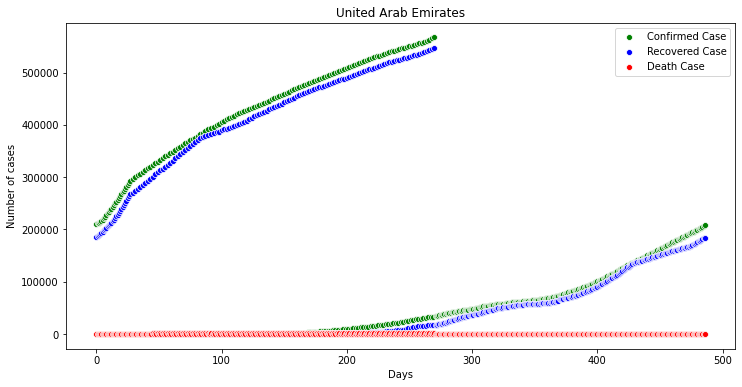

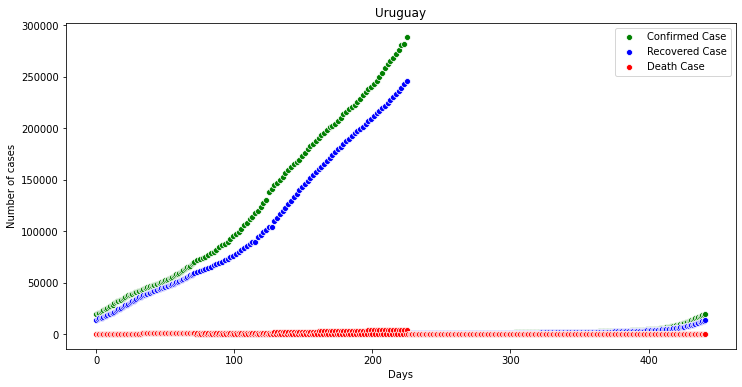

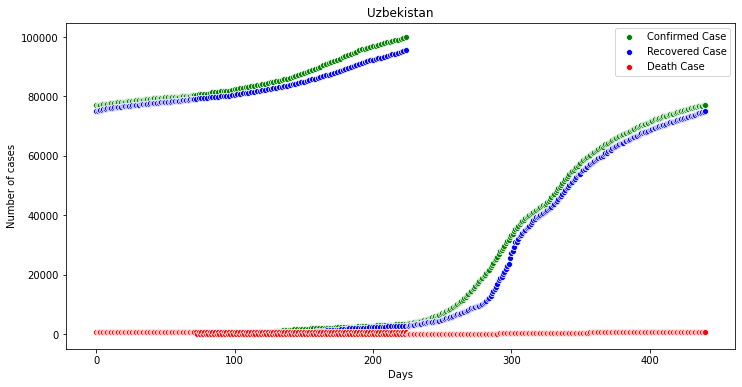

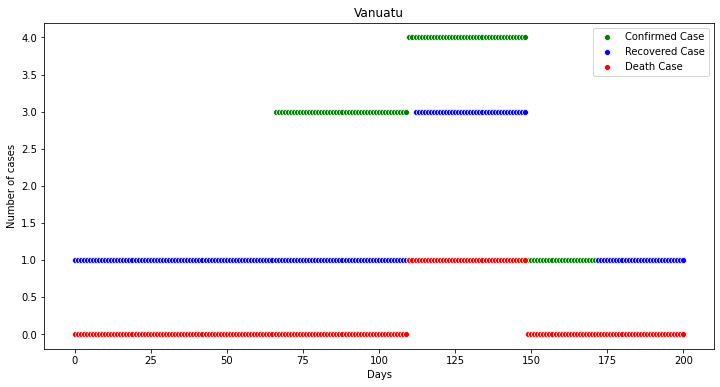

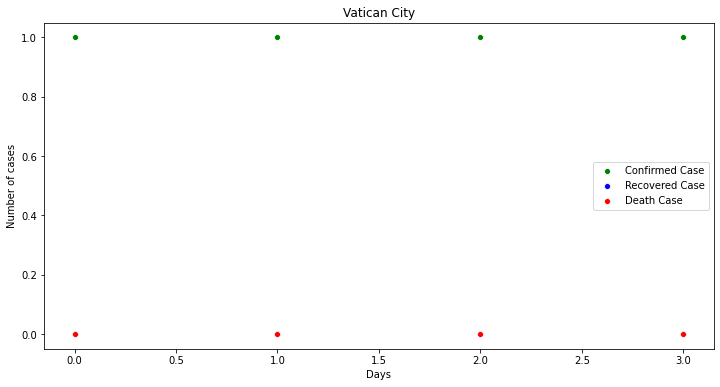

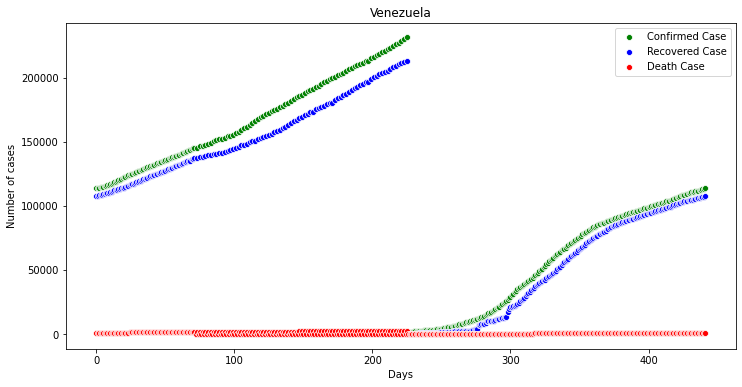

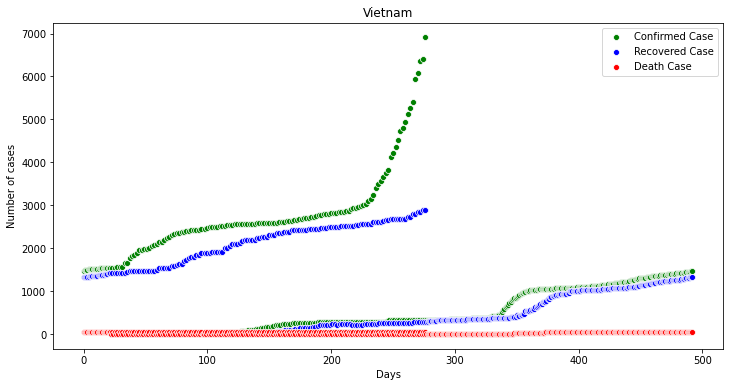

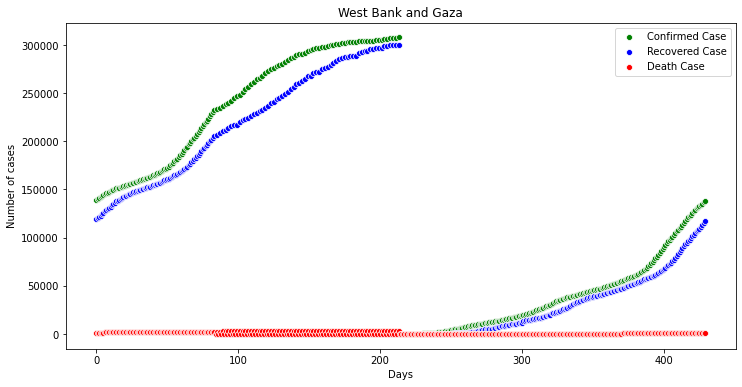

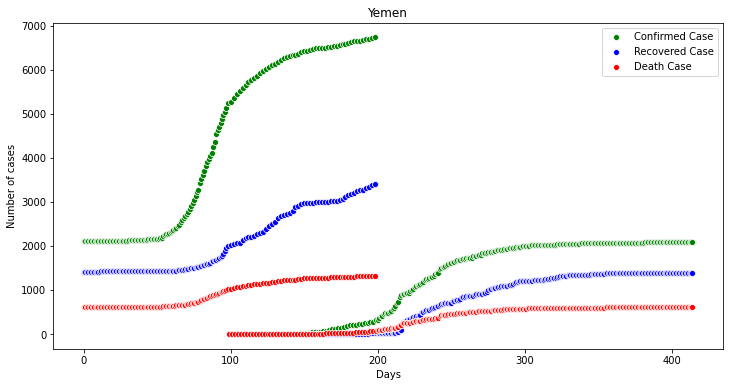

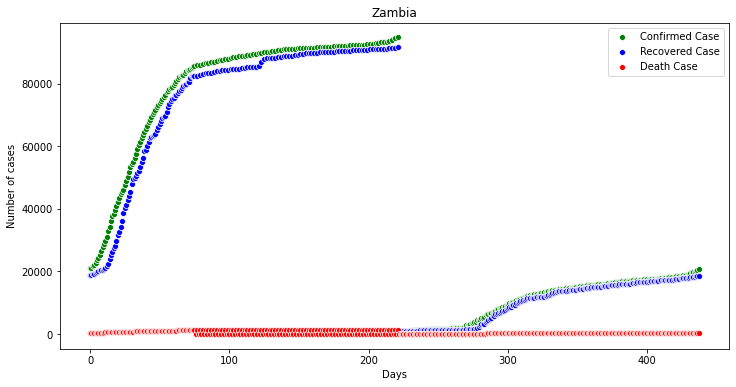

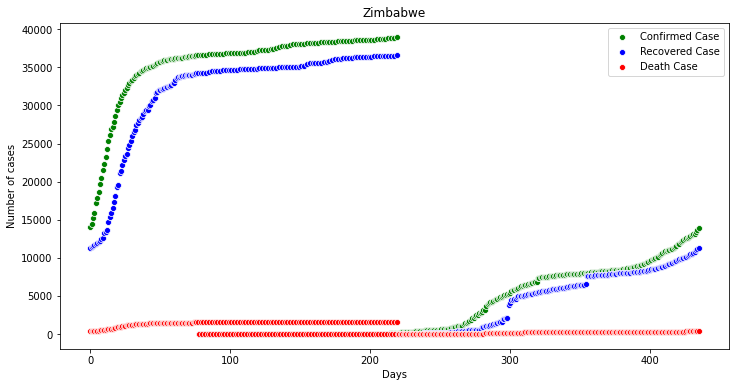

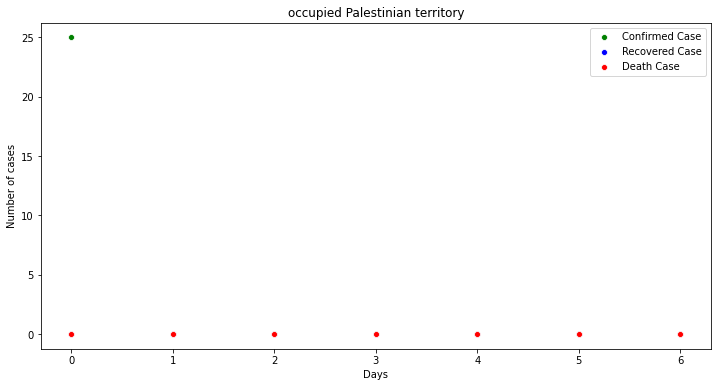

In [31]:
for i in range(0,229):
    key = df3[df3['Country'] == countries[i]].reset_index()
    plt.figure(figsize=(12,6))
    sns.scatterplot(np.arange(0,len(key)),key['Confirmed'],color = 'green', label ='Confirmed Case')
    sns.scatterplot(np.arange(0,len(key)),key['Recovered'],color = 'blue', label ='Recovered Case')
    sns.scatterplot(np.arange(0,len(key)),key['Deaths'],color = 'red', label ='Death Case')
    plt.title(countries[i])
    plt.xlabel('Days')
    plt.ylabel('Number of cases')
    plt.legend(['Confirmed Case', 'Recovered Case', 'Death Case'])
    plt.show()
    

In [29]:
df4 = df3.groupby(['Date'])[['Date', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

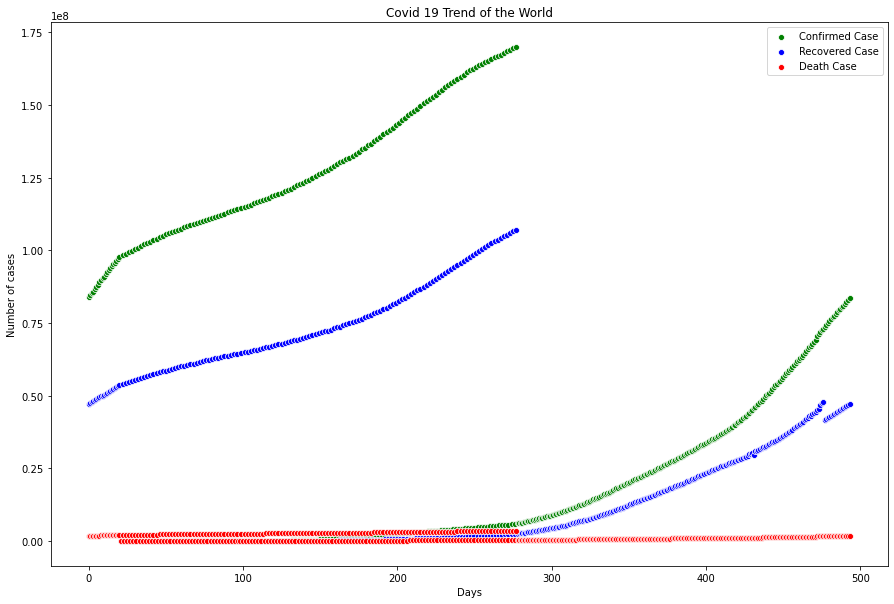

In [32]:
key = df4
plt.figure(figsize=(15,10))
sns.scatterplot(np.arange(0,len(key)),key['Confirmed'],color = 'green', label ='Confirmed Case')
sns.scatterplot(np.arange(0,len(key)),key['Recovered'],color = 'blue', label ='Recovered Case')
sns.scatterplot(np.arange(0,len(key)),key['Deaths'],color = 'red', label ='Death Case')
plt.title('Covid 19 Trend of the World')
plt.xlabel('Days')
plt.ylabel('Number of cases')
plt.legend()
plt.show()
    

In [16]:
df

Date              State         Country  Confirmed  Deaths  \
0       01/22/2020              Anhui  Mainland China        1.0     0.0   
1       01/22/2020            Beijing  Mainland China       14.0     0.0   
2       01/22/2020          Chongqing  Mainland China        6.0     0.0   
3       01/22/2020             Fujian  Mainland China        1.0     0.0   
4       01/22/2020              Gansu  Mainland China        0.0     0.0   
...            ...                ...             ...        ...     ...   
306424  05/29/2021  Zaporizhia Oblast         Ukraine   102641.0  2335.0   
306425  05/29/2021            Zeeland     Netherlands    29147.0   245.0   
306426  05/29/2021           Zhejiang  Mainland China     1364.0     1.0   
306427  05/29/2021    Zhytomyr Oblast         Ukraine    87550.0  1738.0   
306428  05/29/2021       Zuid-Holland     Netherlands   391559.0  4252.0   

        Recovered  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
306424    95289.0  
306425        0.0  
306426     1324.0  
306427    83790.0  
306428        0.0  

[306429 rows x 6 columns]

In [17]:
total_confirm = df['Confirmed'].sum()

In [18]:
total_confirm

26252051758.0

In [34]:
total_death = df['Deaths'].sum()

In [35]:
total_death

624013017.0

In [36]:
total_recover = df['Recovered'].sum()

In [37]:
total_recover

15450237912.0